# Sprint 2 - Molelo de Regressão para Prever o Preço de Carros


## Descrição das Variáveis
* **manufacturer**: nome do fabricante.
* **model**: modelo do carro.
* **year**: ano de produção.
* **mileage**: número de milhas percorridas.
* **engine**: descrição do motor.
* **transmission**: tipo de transmissão.
* **drivetrain**: tipo de tração.
* **fuel_type**: tipo de combustível.
* **mpg**: milhas por galão.
* **exterior_color**: cor externa.
* **interior_color**: cor interna.
* **accidents_or_damage**: Envolvimento em acidentes (1 = sim / 0 = não).
* **one_owner**: Único dono (1 = sim / 0 = não).
* **personal_use_only**: Apenas uso pessoal (1 = sim / 0 = não).
* **seller_name**: Nome do vendedor.
* **seller_rating**: Avaliação do vendedor.
* **driver_rating**: Avaliação do carro pelos motoristas.
* **driver_reviews_num**: Número de avaliações pelos motoristas.
* **price_drop**: Redução do preço em relação ao preço inicial.
* **price**: Preço do carro.

In [589]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

np.random.seed(1)

In [590]:
df = pd.read_csv('cars.csv')

In [591]:
# colhendo a amostra de 25% sobre o dataframe
cars_df = df.sample(frac=0.25, random_state=1)

# 1. Explorando os Dados – pré-limpeza

In [592]:
cars_df.head()

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
456056,Land Rover,Range Rover Sport HSE Dynamic,2018,33585.00,V6,Automatic,Four-wheel Drive,Gasoline,17-23,Santorini Black,Ebony,0.00,1.00,0.00,Schaumburg Ford,4.10,4.00,45.00,500.00,53950.00
563956,Nissan,Armada SL,2017,63009.00,5.6L V8 32V GDI DOHC,7-Speed Automatic,Rear-wheel Drive,Gasoline,14-19,Black,Almond,0.00,0.00,1.00,World Auto Inc.,2.30,4.70,78.00,NaN,27885.00
724184,Toyota,Tundra 1794,2018,51316.00,"I-FORCE 5.7L V-8 DOHC, VVT-i variable valve co...",Automatic,Four-wheel Drive,Gasoline,13-17,SILVER,Brown/Black,0.00,NaN,1.00,CAL Cars,4.40,4.80,199.00,1000.00,46995.00
706657,Toyota,Avalon XLE,2015,89444.00,3.5L V6 24V MPFI DOHC,6-Speed Automatic,Front-wheel Drive,Gasoline,21-31,Cosmic Gray Mica,Light Gray,0.00,1.00,1.00,Scanlon Lexus,4.70,4.70,74.00,482.00,17987.00
551197,Mercedes-Benz,GLS 450 4MATIC,2023,2191.00,3.0L I6 24V GDI DOHC Turbo,9-Speed Automatic,All-wheel Drive,Gasoline,NaN,2191,Tartufo Brown,0.00,1.00,1.00,Lupient Buick GMC,4.50,NaN,0.00,5969.00,96648.00


In [593]:
cars_df.tail()

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
340527,Hyundai,Elantra SE,2017,52900.00,"Nu 2L I-4 DOHC, D-CVVT variable valve control,...",6-Speed Automatic,Front-wheel Drive,Gasoline,29-38,Lakeside Blue,Gray,0.00,0.00,0.00,Bommarito Nissan Hazelwood,4.80,4.70,640.00,NaN,16995.00
618501,RAM,ProMaster 1500 Low Roof,2015,45195.00,3.0L I4 16V DDI DOHC Turbo Diesel,Automatic,Front-wheel Drive,Diesel,NaN,Bright White Clearcoat,Gray,0.00,0.00,1.00,Woody's Dodge Jeep Chrysler RAM,4.60,4.10,5.00,NaN,54870.00
673837,Toyota,Highlander,2013,160000.00,3.5L V6 24V MPFI DOHC,5-Speed Automatic,All-wheel Drive,Gasoline,17-22,White,Beige,0.00,1.00,1.00,Trade Guru,3.40,4.70,140.00,NaN,13991.00
291906,GMC,Yukon XL Denali,2016,102462.00,6.2L V8 16V GDI OHV,8-Speed Automatic,Rear-wheel Drive,Gasoline,15-22,Onyx Black,Jet Black,0.00,0.00,1.00,Murray Ford Superstore,4.80,4.70,26.00,213.00,32777.00
559392,Nissan,Frontier SV,2021,18568.00,3.8L V6 24V GDI DOHC,9-Speed Automatic,Rear-wheel Drive,Gasoline,18-24,Arctic Blue Metallic,Wheat,0.00,1.00,1.00,EchoPark Automotive Raleigh,4.90,4.50,9.00,1370.00,28319.00


In [594]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 190523 entries, 456056 to 559392
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   manufacturer         190523 non-null  object 
 1   model                190523 non-null  object 
 2   year                 190523 non-null  int64  
 3   mileage              190403 non-null  float64
 4   engine               186724 non-null  object 
 5   transmission         188036 non-null  object 
 6   drivetrain           185161 non-null  object 
 7   fuel_type            184720 non-null  object 
 8   mpg                  154790 non-null  object 
 9   exterior_color       188314 non-null  object 
 10  interior_color       176409 non-null  object 
 11  accidents_or_damage  184474 non-null  float64
 12  one_owner            182675 non-null  float64
 13  personal_use_only    184325 non-null  float64
 14  seller_name          188306 non-null  object 
 15  seller_rating    

Podemos notar que há bastante dados faltantes no dataset.

In [595]:
pd.options.display.float_format = '{:.2f}'.format
cars_df.describe()

,year,mileage,accidents_or_damage,one_owner,personal_use_only,seller_rating,driver_rating,driver_reviews_num,price_drop,price
count,190523.00,190403.00,184474.00,182675.00,184325.00,137082.00,182603.00,190523.00,102644.00,190523.00
mean,2017.81,55719.12,0.23,0.56,0.66,4.16,4.62,89.43,1009.27,43085.81
std,5.04,43625.79,0.42,0.50,0.47,0.80,0.28,115.00,1309.60,3239942.05
min,1923.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,100.00,319.00
25%,2016.00,23177.50,0.00,0.00,0.00,3.80,4.50,14.00,384.00,19588.00
50%,2019.00,45468.00,0.00,1.00,1.00,4.50,4.70,51.00,645.00,27995.00
75%,2021.00,78427.50,0.00,1.00,1.00,4.70,4.80,119.00,1009.00,39500.00
max,2023.00,999999.00,1.00,1.00,1.00,5.00,5.00,1025.00,79909.00,1000000000.00


Já de início, notamos que os valores máximos de ```mileage``` e ```price``` apresentam outliers.

No caso de ```mileage```, podemos considerar com uma certa confiança que a probabilidade de um carro aguentar uma milhagem acima de 500.000 é bastante remota.

In [757]:
# possíveis outliers em mileage
cars_df[cars_df['mileage'] > 499999.00].head(10)

,manufacturer,model,year,mileage,engine,accidents_or_damage,seller_rating,driver_rating,driver_reviews_num,price_drop,price,engine_size,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,one_owner,personal_use_only
302334,Honda,Pilot LX,2020,754680.00,3.5L V6 24V GDI SOHC,0.00,5.00,4.30,156.00,500.00,20499.00,3.5L,Automatic,FWD,Gasoline,23.00,White,Black,1.00,1.00
220337,Ford,Transit-350 XLT,2017,549013.00,3.5L V6 24V GDI DOHC Twin Turbo,1.00,1.80,4.40,28.00,NaN,11795.00,3.5L,Automatic,RWD,Gasoline,24.63,Black,Black,1.00,1.00
494409,Lincoln,Continental,1967,999999.00,V8,0.00,3.20,NaN,0.00,4000.00,22900.00,None,Automatic,Other,Gasoline,13.40,Gold,Black,1.00,1.00
456962,Land Rover,Range Rover Sport Supercharged SE,2016,644736.00,3.0L V6 24V GDI DOHC Supercharged,0.00,NaN,4.60,41.00,NaN,34777.00,3.0L,Automatic,4WD,Gasoline,20.00,Red,Black,0.00,1.00
316531,Honda,Ridgeline RTS,2006,543099.00,3.5L V6 24V MPFI SOHC,1.00,NaN,4.60,103.00,NaN,6999.00,3.5L,Automatic,4WD,Gasoline,18.50,Black,Gray,1.00,1.00
617503,Porsche,356 A,1959,974302.00,NaN,0.00,NaN,NaN,0.00,5000.00,179500.00,None,Manual,Other,Other,14.50,Green,Brown,1.00,1.00
220225,Ford,Transit-350 XL,2016,620637.00,3.7L V6 24V MPFI DOHC,1.00,NaN,4.30,22.00,NaN,39990.00,3.7L,Automatic,RWD,Other,24.79,White,Gray,1.00,1.00


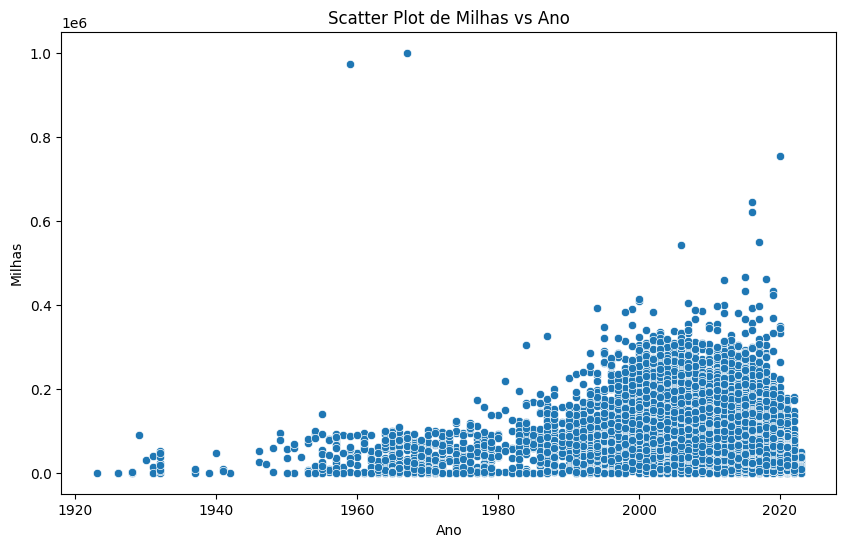

In [758]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='mileage', data=cars_df)
plt.title('Scatter Plot de Milhas vs Ano')
plt.xlabel('Ano')
plt.ylabel('Milhas')
plt.show()

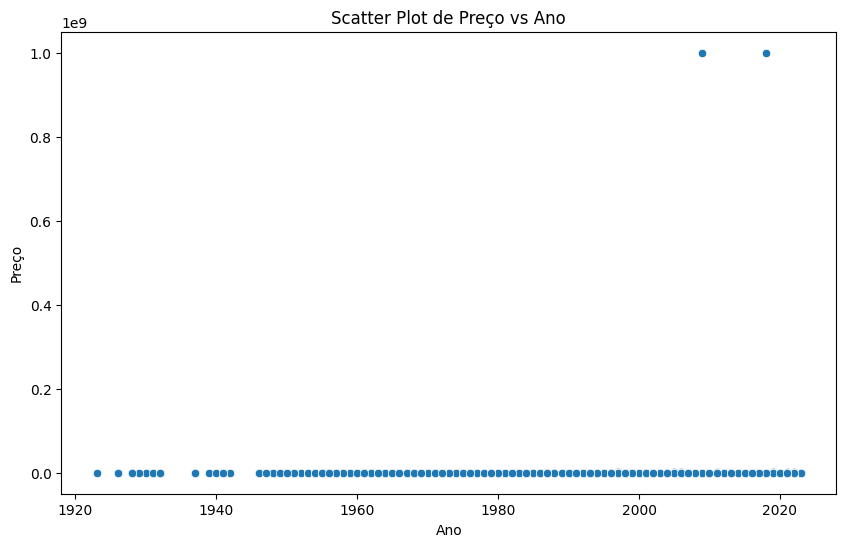

In [759]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='price', data=cars_df)
plt.title('Scatter Plot de Preço vs Ano')
plt.xlabel('Ano')
plt.ylabel('Preço')
plt.show()

In [597]:
# outliers em preços
cars_df[cars_df['price'] == 1000000000]

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
188260,Dodge,Durango Citadel,2018,113207.00,3.6L V6 24V MPFI DOHC,8-Speed Automatic,All-wheel Drive,Gasoline,18-25,DB Black Clearcoat,Black,0.00,1.00,1.00,"Rothrock Nissan, Chrysler, Dodge, Jeep, RAM",4.60,4.80,146.00,NaN,1000000000.00
108142,Chevrolet,Cobalt LT,2009,85185.00,2.2L I4 16V MPFI DOHC,4-Speed Automatic,Front-wheel Drive,Gasoline,NaN,Black,Gray,0.00,1.00,1.00,"Rothrock Nissan, Chrysler, Dodge, Jeep, RAM",4.60,4.20,90.00,NaN,1000000000.00


Vamos fazer também uma representação do valores faltantes.

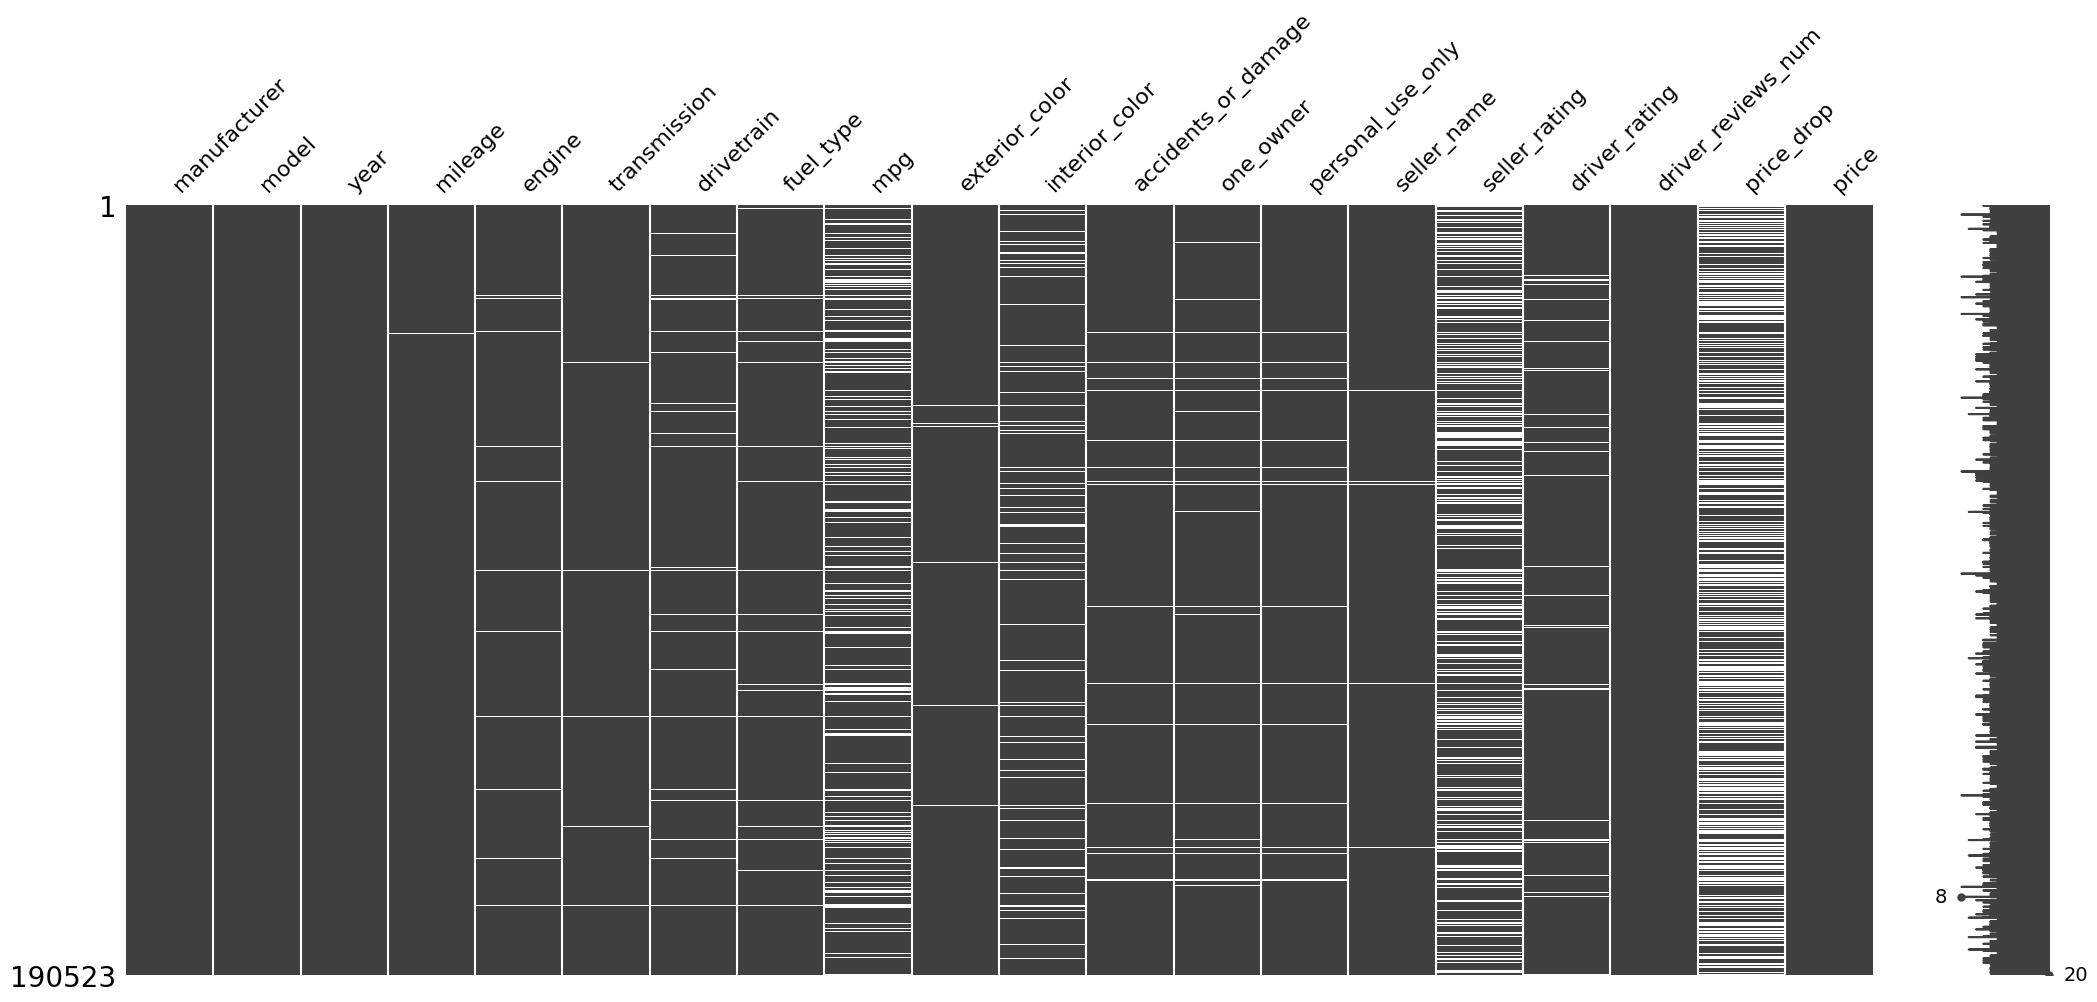

In [598]:
import missingno as msno
msno.matrix(cars_df)
plt.show()

Acima, podemos ver que quase todas as colunas possuem valores faltantes, com exceção de ```manufacturer```, ```model```, ```year```, ```driver_reviews_num``` e ```price```. 

Vamos agora analisar e limpar algumas colunas com dados faltantes:

# 2. Limpeza dos Dados

## 2.1 Coluna ```price```

In [751]:
cars_df['price'].describe()

count       190523.00
mean         43085.81
std        3239942.05
min            319.00
25%          19588.00
50%          27995.00
75%          39500.00
max     1000000000.00
Name: price, dtype: float64

Confirmando o que vimos acima, possuímos dois outliers em ```price```. Vamos exclui-los.

In [760]:
cars_df = cars_df[cars_df['price'] < 1_000_000_000]

Agora podemos ver com mais clareza a distribuição dos valores em ```price```.

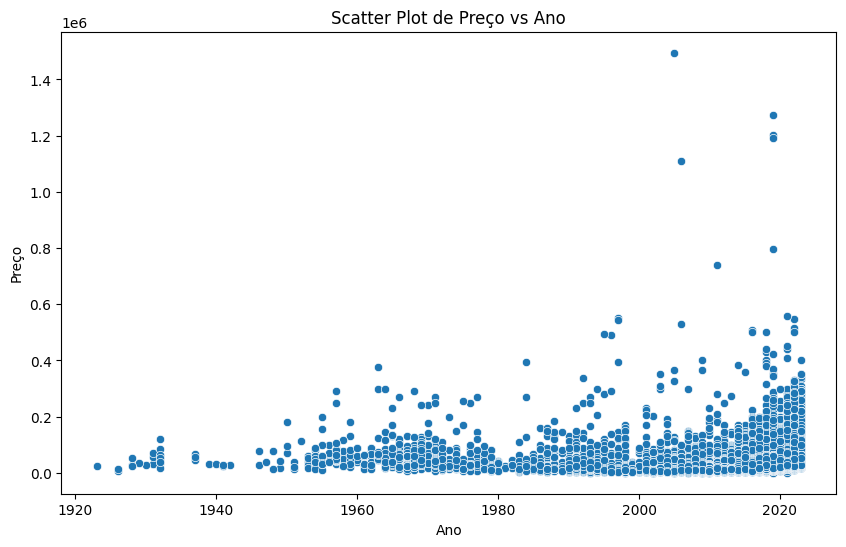

In [762]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='price', data=cars_df)
plt.title('Scatter Plot de Preço vs Ano')
plt.xlabel('Ano')
plt.ylabel('Preço')
plt.show()

In [770]:
cars_df[cars_df['price'] > 1000000]

,manufacturer,model,year,mileage,engine,accidents_or_damage,seller_rating,driver_rating,driver_reviews_num,price_drop,price,engine_size,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,one_owner,personal_use_only
91190,Cadillac,DTS,2006,158021.00,4.6L V8 32V MPFI DOHC,0.00,3.40,4.60,79.00,NaN,1111111.00,4.6L,Automatic,FWD,Gasoline,22.08,Brown,Other,0.00,1.00
615573,Porsche,911 Turbo S,2019,134.00,3.8L H6 24V GDI DOHC Twin Turbo,0.00,NaN,4.90,13.00,10000.00,1200888.00,3.8L,Automatic,AWD,Gasoline,21.50,Black,Black,1.00,1.00
613083,Porsche,Carrera GT,2005,5052.00,5.7L V10 40V MPFI DOHC,0.00,NaN,4.50,5.00,NaN,1495000.00,5.7L,Manual,RWD,Gasoline,13.00,Silver,Brown,1.00,1.00
213647,Ford,GT,2019,3215.00,3.5L 6 Cylinder,0.00,4.60,NaN,0.00,935.00,1190000.00,3.5L,Automatic,RWD,Gasoline,25.16,Blue,Black,0.00,1.00
213658,Ford,GT,2019,255.00,3.5L V6 Twin Turbo,0.00,NaN,NaN,0.00,15000.00,1275000.00,3.5L,Automatic,Other,Gasoline,25.16,Red,Other,0.00,0.00


Em pesquisa em sites na internet, parece que o preço do Cadillac também representa um erro. Assim, a linha também será excluída.

In [772]:
cars_df = cars_df[~(cars_df['price'] == 1111111)]

In [773]:
cars_df[cars_df['price'] > 1000000]

,manufacturer,model,year,mileage,engine,accidents_or_damage,seller_rating,driver_rating,driver_reviews_num,price_drop,price,engine_size,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,one_owner,personal_use_only
615573,Porsche,911 Turbo S,2019,134.00,3.8L H6 24V GDI DOHC Twin Turbo,0.00,NaN,4.90,13.00,10000.00,1200888.00,3.8L,Automatic,AWD,Gasoline,21.50,Black,Black,1.00,1.00
613083,Porsche,Carrera GT,2005,5052.00,5.7L V10 40V MPFI DOHC,0.00,NaN,4.50,5.00,NaN,1495000.00,5.7L,Manual,RWD,Gasoline,13.00,Silver,Brown,1.00,1.00
213647,Ford,GT,2019,3215.00,3.5L 6 Cylinder,0.00,4.60,NaN,0.00,935.00,1190000.00,3.5L,Automatic,RWD,Gasoline,25.16,Blue,Black,0.00,1.00
213658,Ford,GT,2019,255.00,3.5L V6 Twin Turbo,0.00,NaN,NaN,0.00,15000.00,1275000.00,3.5L,Automatic,Other,Gasoline,25.16,Red,Other,0.00,0.00


In [776]:
sorted_cars_df = cars_df.sort_values(by='price', ascending=False)
sorted_cars_df.tail(50)

,manufacturer,model,year,mileage,engine,accidents_or_damage,seller_rating,driver_rating,driver_reviews_num,price_drop,price,engine_size,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,one_owner,personal_use_only
250565,Ford,Taurus SES,2000,240000.00,155.0HP 3.0L V6 Cylinder Engine Flex Fuel Capa...,0.00,NaN,3.90,35.00,NaN,2000.00,3.0L,Automatic,FWD,Flex Fuel,19.89,Black,Beige,1.00,1.00
70594,Buick,Lucerne CX,2006,102671.00,3.8L V-6 engine with 197HP,1.00,NaN,4.50,51.00,NaN,1999.00,3.8L,Automatic,FWD,Gasoline,22.50,Gold,Beige,0.00,0.00
181488,Dodge,Charger SE,2012,120242.00,"3.6L V-6 DOHC, variable valve control, engine ...",0.00,NaN,4.70,85.00,NaN,1999.00,3.6L,Automatic,RWD,Flex Fuel,23.00,Gray,Gray,0.00,0.00
78369,Buick,LaCrosse Premium 2,2012,179785.00,"3.6L V-6 gasoline direct injection, DOHC, vari...",1.00,NaN,4.70,71.00,NaN,1999.00,3.6L,Automatic,FWD,Flex Fuel,22.00,Black,Black,0.00,1.00
535222,Mercedes-Benz,C-Class C240,2003,151000.00,168.0HP 2.6L V6 Cylinder Engine Gasoline Fuel,0.00,NaN,4.40,56.00,NaN,1999.00,2.6L,Automatic,RWD,Gasoline,20.66,Silver,Black,1.00,1.00
141437,Chevrolet,Trailblazer LT,2006,289488.00,4.2L I6 24V MPFI DOHC,0.00,4.80,4.30,88.00,NaN,1999.00,4.2L,Automatic,4WD,Gasoline,22.08,Gray,Gray,0.00,1.00
368440,INFINITI,G37x Base,2012,112131.00,"VQ 3.7L V-6 DOHC, variable valve control, engi...",0.00,1.00,4.70,9.00,NaN,1999.00,3.7L,Automatic,AWD,Gasoline,21.50,Black,Beige,0.00,0.00
292684,GMC,Yukon XL SLT,2003,254000.00,5.3L V8 16V MPFI OHV Flexible Fuel,0.00,3.70,4.60,22.00,NaN,1997.00,5.3L,Automatic,4WD,Flex Fuel,20.66,Green,Gray,0.00,0.00
498327,Mazda,Mazda6 iSport VE,2008,263416.00,2.3L I4 16V MPFI DOHC,0.00,2.30,4.50,35.00,NaN,1995.00,2.3L,Automatic,FWD,Gasoline,24.50,Silver,Gray,0.00,0.00
487073,Lincoln,Town Car Signature,2007,352972.00,4.6L V8 16V MPFI SOHC,0.00,2.90,4.70,38.00,500.00,1995.00,4.6L,Automatic,RWD,Other,21.00,Black,Other,0.00,0.00


Não sei dizer se os menores valores de ```price``` também são outliers. Considerando que alguns detalhes sobre a condição dos carros podem estar fora do dataframe, decidi por manter esses valores.

## 2.2 Coluna ```manufacturer```

## 2.3 Coluna ```model```

In [854]:
cars_df['model'].value_counts()

model
Fusion SE                     774
Corolla LE                    742
Sportage LX                   691
Sentra SV                     682
GLC 300 Base 4MATIC           657
                             ... 
TLX TECH                        1
Ram 3500 SLT Quad Cab DRW       1
Focus ZX4 ST                    1
C-Class C 350 4MATIC Sport      1
S-Type 4.0                      1
Name: count, Length: 7963, dtype: int64

Tentei usar regex para reduzir a quantidade de modelos, mas uma vez que essa coluna tem 7963 valores, a tarefa se mostrou infindável. Assim, a solução terá que ser outra.

## 2.4 Coluna ```year```

## 2.5 Coluna ```mileage```

In [599]:
cars_df[cars_df['mileage'].isna()]

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
442644,Kia,K5 LX,2021,NaN,1.6L I4 16V GDI DOHC Turbo,8-Speed Automatic,Front-wheel Drive,Gasoline,29-38,Ebony Black,Black,0.00,1.00,1.00,Car Pros Kia Glendale,3.30,4.60,71.00,NaN,23991.00
409035,Jeep,Renegade Latitude,2020,NaN,2.4L I4 16V MPFI SOHC,9-Speed Automatic,Four-wheel Drive,Gasoline,21-29,Slate Blue Pearlcoat,Black,1.00,0.00,0.00,Sleepy Hollow Chrysler Jeep Dodge Ram,4.60,4.50,53.00,509.00,24990.00
610693,Porsche,Macan,2023,NaN,2.0L I4 16V GDI DOHC Turbo,7-Speed PDK Automatic,All-wheel Drive,Gasoline,NaN,Jet Black Metallic,NaN,0.00,1.00,0.00,Porsche Chantilly,4.80,4.50,3.00,NaN,68990.00
247993,Ford,Ranger XL,2010,NaN,2.3L I4 16V MPFI DOHC,5-Speed Automatic,Rear-wheel Drive,Gasoline,22-27,White,NaN,NaN,NaN,NaN,ACRA Pre-Owned Superstore,NaN,4.30,43.00,NaN,6995.00
10683,Audi,Q7 2.0T Premium Plus,2018,NaN,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,All-wheel Drive,Gasoline,19-25,Galaxy Blue Metallic,Nougat Brown,1.00,0.00,1.00,Dynamic Motors,3.40,4.70,63.00,1000.00,26995.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607871,Porsche,Cayenne Platinum Edition,2023,NaN,3.0L V6 24V GDI DOHC Turbo,8-Speed Automatic with Tiptronic,All-wheel Drive,Gasoline,NaN,White,Black,0.00,NaN,1.00,Porsche Beachwood,4.90,NaN,0.00,NaN,102620.00
489390,Lincoln,Corsair Reserve,2020,NaN,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,All-wheel Drive,Gasoline,21-29,Pristine White,Ebony,0.00,1.00,0.00,Apple Ford Lincoln Apple Valley,4.50,4.60,51.00,NaN,38999.00
481569,Lexus,LX 470 Base (A5),2006,NaN,4.7L V8 32V MPFI DOHC,5-Speed Automatic,Four-wheel Drive,Gasoline,13-17,Black,Black,1.00,0.00,1.00,Dynamic Motors,3.50,4.80,6.00,1000.00,15995.00
151966,Chevrolet,Cruze Limited 1LT,2016,NaN,1.4L I4 16V MPFI DOHC Turbo,6-Speed Automatic,Front-wheel Drive,Gasoline,26-38,Champagne Silver,Jet Black,1.00,0.00,1.00,O'Meara Ford,4.30,4.60,79.00,NaN,12900.00


Podemos subsituir as milhas faltantes pela média das milhas.

In [600]:
mean_mileage_by_year = cars_df.groupby('year')['mileage'].transform('mean')

In [601]:
cars_df['mileage'] = cars_df['mileage'].fillna(mean_mileage_by_year)

In [602]:
cars_df[cars_df['mileage'].isna()]

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price


## 2.6 Coluna ```engine```

In [603]:
import re

def extract_engine_size(text):
    if isinstance(text, str):
        match = re.search(r"\b\d+(\.\d+)?\s*L\b", text)
        return match.group(0) if match else None
    return None

cars_df["engine_size"] = cars_df["engine"].apply(extract_engine_size)

# # List of regex patterns for different aspects of the engine descriptions
# patterns = [
#     r'(\d+\.\d+L\s[A-Z]+\s\d+V)',  # Basic engine info
#     r'DOHC',  # DOHC feature
#     r'Turbo',  # Turbocharged feature
#     r'MultiAir',  # MultiAir feature
# ]

# # Applying each pattern separately and merging the results
# for i, pattern in enumerate(patterns):
#     cars_df[f'engine_info_{i}'] = cars_df['engine'].str.extract(pattern, expand=False)

# # Merging the extracted features into a single column if desired
# cars_df['engine_features'] = cars_df.filter(regex='engine_info_').apply(lambda x: ', '.join(x.dropna().astype(str)), axis=1)

cars_df = cars_df.to_frame
# # Viewing the updated DataFrame
print(cars_df)

# cars_df['engine'].value_counts()

AttributeError: 'DataFrame' object has no attribute 'to_frame'

## 2.7 Coluna ```transmission```

In [604]:
pd.set_option("display.max_rows", 100)
cars_df['transmission'].value_counts()

transmission
6-Speed Automatic                                                   37121
8-Speed Automatic                                                   34780
Automatic CVT                                                       27263
Automatic                                                           24306
9-Speed Automatic                                                   15314
                                                                    ...  
Aisin e-CVT Powersplit                                                  1
5-Speed Automatic with SelectShift                                      1
Wide-range 5-speed automatic transmission w/OD, lockup torque co        1
7-SPEED AUTOMATIC                                                       1
Auto, 8-Spd M Sport Drivelogic/Sport/Manual Modes                       1
Name: count, Length: 654, dtype: int64

Decidi criar apenas 5 categorias de transmissão para reduzir os valores únicos dessa coluna. De início eram 6, no entanto, apenas um carro ficou na categoria Tiptronic. Assim, achei melhor colocá-lo na categoria ```Other```. 

In [605]:
# criando uma função para lidar com os valores na coluna transmission:
def classify_transmission(transmission):
    patterns = {
        'Manual': r'(Manual|M\/T)\b',
        'Automatic': r'(Automatic|Auto|A\/T|AWD)\b',
        'CVT': r'(CVT|Cvt|Variable Transmission)\b',
        'Semi-Auto': r'(Automatic\s+(?:with\s+)?(Auto-Shift|PowerShift|Geartronic))\b',
        'Dual-Clutch': r'(DCT|Dual Clutch|Dual)\b'
    }
    
    if pd.isnull(transmission): 
        return 'Other' 
    
    for category, pattern in patterns.items():
        if re.search(pattern, transmission, re.IGNORECASE):
            return category
    
    return 'Other' 

# aplicando a função
cars_df['category'] = cars_df['transmission'].apply(classify_transmission)
cars_df['category'].value_counts()

category
Automatic      178755
Manual           5964
Other            4095
CVT              1403
Dual-Clutch       306
Name: count, dtype: int64

In [606]:
# retirando a coluna transmission e renomeando category
cars_df.drop('transmission', axis=1, inplace=True)

cars_df.rename(columns={'category': 'transmission'}, inplace=True)

In [607]:
cars_df.head()

,manufacturer,model,year,mileage,engine,drivetrain,fuel_type,mpg,exterior_color,interior_color,...,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price,engine_size,transmission
456056,Land Rover,Range Rover Sport HSE Dynamic,2018,33585.00,V6,Four-wheel Drive,Gasoline,17-23,Santorini Black,Ebony,...,1.00,0.00,Schaumburg Ford,4.10,4.00,45.00,500.00,53950.00,None,Automatic
563956,Nissan,Armada SL,2017,63009.00,5.6L V8 32V GDI DOHC,Rear-wheel Drive,Gasoline,14-19,Black,Almond,...,0.00,1.00,World Auto Inc.,2.30,4.70,78.00,NaN,27885.00,5.6L,Automatic
724184,Toyota,Tundra 1794,2018,51316.00,"I-FORCE 5.7L V-8 DOHC, VVT-i variable valve co...",Four-wheel Drive,Gasoline,13-17,SILVER,Brown/Black,...,NaN,1.00,CAL Cars,4.40,4.80,199.00,1000.00,46995.00,5.7L,Automatic
706657,Toyota,Avalon XLE,2015,89444.00,3.5L V6 24V MPFI DOHC,Front-wheel Drive,Gasoline,21-31,Cosmic Gray Mica,Light Gray,...,1.00,1.00,Scanlon Lexus,4.70,4.70,74.00,482.00,17987.00,3.5L,Automatic
551197,Mercedes-Benz,GLS 450 4MATIC,2023,2191.00,3.0L I6 24V GDI DOHC Turbo,All-wheel Drive,Gasoline,NaN,2191,Tartufo Brown,...,1.00,1.00,Lupient Buick GMC,4.50,NaN,0.00,5969.00,96648.00,3.0L,Automatic


## 2.8 Coluna ```drivetrain```

Valores únicos de ```drivetrain```:

In [608]:
cars_df['drivetrain'].value_counts()

drivetrain
Front-wheel Drive                                              60222
All-wheel Drive                                                57707
Four-wheel Drive                                               39350
Rear-wheel Drive                                               24325
FWD                                                             1563
AWD                                                              910
4WD                                                              480
RWD                                                              446
All-Wheel Drive                                                   33
Unknown                                                           27
Front-Wheel Drive                                                 26
Four-Wheel Drive with Locking and Limited-Slip Differential       13
Front-Wheel Drive with Limited-Slip Differential                  11
Four-Wheel Drive                                                  10
Rear-Wheel Drive       

Valores ```NaN```:

In [609]:
cars_df['drivetrain'].isna().sum()

5362

In [610]:
def classify_drivetrain(drivetrain):
    patterns = {
        'FWD': r'(Front|FWD)\b',
        'AWD': r'(All|AWD)\b',
        '4WD': r'(4x4|Four|4WD)\b',
        'RWD': r'(Rear|4x2|RWD)\b'
    }
    
    if pd.isnull(drivetrain): 
        return 'Other' 
    
    for category, pattern in patterns.items():
        if re.search(pattern, drivetrain, re.IGNORECASE):
            return category
    
    return 'Other' 

# aplicando a função
cars_df['category'] = cars_df['drivetrain'].apply(classify_drivetrain)
cars_df['category'].value_counts()

category
FWD      61828
AWD      58663
4WD      39861
RWD      24782
Other     5389
Name: count, dtype: int64

In [611]:
cars_df.head()

,manufacturer,model,year,mileage,engine,drivetrain,fuel_type,mpg,exterior_color,interior_color,...,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price,engine_size,transmission,category
456056,Land Rover,Range Rover Sport HSE Dynamic,2018,33585.00,V6,Four-wheel Drive,Gasoline,17-23,Santorini Black,Ebony,...,0.00,Schaumburg Ford,4.10,4.00,45.00,500.00,53950.00,None,Automatic,4WD
563956,Nissan,Armada SL,2017,63009.00,5.6L V8 32V GDI DOHC,Rear-wheel Drive,Gasoline,14-19,Black,Almond,...,1.00,World Auto Inc.,2.30,4.70,78.00,NaN,27885.00,5.6L,Automatic,RWD
724184,Toyota,Tundra 1794,2018,51316.00,"I-FORCE 5.7L V-8 DOHC, VVT-i variable valve co...",Four-wheel Drive,Gasoline,13-17,SILVER,Brown/Black,...,1.00,CAL Cars,4.40,4.80,199.00,1000.00,46995.00,5.7L,Automatic,4WD
706657,Toyota,Avalon XLE,2015,89444.00,3.5L V6 24V MPFI DOHC,Front-wheel Drive,Gasoline,21-31,Cosmic Gray Mica,Light Gray,...,1.00,Scanlon Lexus,4.70,4.70,74.00,482.00,17987.00,3.5L,Automatic,FWD
551197,Mercedes-Benz,GLS 450 4MATIC,2023,2191.00,3.0L I6 24V GDI DOHC Turbo,All-wheel Drive,Gasoline,NaN,2191,Tartufo Brown,...,1.00,Lupient Buick GMC,4.50,NaN,0.00,5969.00,96648.00,3.0L,Automatic,AWD


In [612]:
# retirando a coluna drivetrain e renomeando category
cars_df.drop('drivetrain', axis=1, inplace=True)
cars_df.rename(columns={'category': 'drivetrain'}, inplace=True)
cars_df.head()

,manufacturer,model,year,mileage,engine,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,...,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price,engine_size,transmission,drivetrain
456056,Land Rover,Range Rover Sport HSE Dynamic,2018,33585.00,V6,Gasoline,17-23,Santorini Black,Ebony,0.00,...,0.00,Schaumburg Ford,4.10,4.00,45.00,500.00,53950.00,None,Automatic,4WD
563956,Nissan,Armada SL,2017,63009.00,5.6L V8 32V GDI DOHC,Gasoline,14-19,Black,Almond,0.00,...,1.00,World Auto Inc.,2.30,4.70,78.00,NaN,27885.00,5.6L,Automatic,RWD
724184,Toyota,Tundra 1794,2018,51316.00,"I-FORCE 5.7L V-8 DOHC, VVT-i variable valve co...",Gasoline,13-17,SILVER,Brown/Black,0.00,...,1.00,CAL Cars,4.40,4.80,199.00,1000.00,46995.00,5.7L,Automatic,4WD
706657,Toyota,Avalon XLE,2015,89444.00,3.5L V6 24V MPFI DOHC,Gasoline,21-31,Cosmic Gray Mica,Light Gray,0.00,...,1.00,Scanlon Lexus,4.70,4.70,74.00,482.00,17987.00,3.5L,Automatic,FWD
551197,Mercedes-Benz,GLS 450 4MATIC,2023,2191.00,3.0L I6 24V GDI DOHC Turbo,Gasoline,NaN,2191,Tartufo Brown,0.00,...,1.00,Lupient Buick GMC,4.50,NaN,0.00,5969.00,96648.00,3.0L,Automatic,AWD


## 2.9 Coluna ```fuel_type```

In [613]:
cars_df['fuel_type'].value_counts()


fuel_type
Gasoline                         161118
Hybrid                             7270
Diesel                             7044
E85 Flex Fuel                      4641
Electric                           4033
B                                   348
Flexible Fuel                       125
Plug-In Hybrid                       30
Gasoline Fuel                        29
Gasoline/Mild Electric Hybrid        20
Regular Unleaded                     13
G                                    12
Premium Unleaded                     11
Compressed Natural Gas                6
Unspecified                           6
Gaseous                               2
Hydrogen Fuel Cell                    2
Electric Fuel System                  2
Biodiesel                             1
Hybrid Fuel                           1
Diesel Fuel                           1
Natural Gas                           1
Gas                                   1
PHEV                                  1
Gas/Electric Hybrid           

Podemos ver algumas categorias repetidas acima. Vamos reduzi-las.

In [614]:
def classify_fuel_type(fuel_type):
    patterns = {
        'Hybrid': r'\b(Hybrid|Plug-In Hybrid|Gasoline/Mild Electric Hybrid|Gas\/Electric Hybrid|PHEV)\b',
        'Gasoline': r'\b(Gasoline|Gas|Regular Unleaded|Premium Unleaded|G)\b',
        'Diesel': r'\b(Diesel|Biodiesel)\b',
        'Flex Fuel': r'\b(E85 Flex Fuel|Flexible Fuel|Flex Fuel Capability)\b',
        'Electric': r'\b(Electric|Electric Fuel System)\b',
        'Natural Gas': r'\b(Compressed Natural Gas|Natural Gas|Gaseous)\b',
        'Hydrogen': r'\b(Hydrogen Fuel Cell)\b'
    }
    
    if pd.isnull(fuel_type): 
        return 'Other' 
    
    for category, pattern in patterns.items():
        if re.search(pattern, fuel_type, re.IGNORECASE):
            return category
    
    return 'Other' 

cars_df['category'] = cars_df['fuel_type'].apply(classify_fuel_type)
cars_df['category'].value_counts()


category
Gasoline       161191
Hybrid           7323
Diesel           7046
Other            6157
Flex Fuel        4767
Electric         4035
Natural Gas         2
Hydrogen            2
Name: count, dtype: int64

E agora, removamos a coluna original:

In [615]:
cars_df.drop('fuel_type', axis=1, inplace=True)
cars_df.rename(columns={'category': 'fuel_type'}, inplace=True)
cars_df.head()

,manufacturer,model,year,mileage,engine,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,...,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price,engine_size,transmission,drivetrain,fuel_type
456056,Land Rover,Range Rover Sport HSE Dynamic,2018,33585.00,V6,17-23,Santorini Black,Ebony,0.00,1.00,...,Schaumburg Ford,4.10,4.00,45.00,500.00,53950.00,None,Automatic,4WD,Gasoline
563956,Nissan,Armada SL,2017,63009.00,5.6L V8 32V GDI DOHC,14-19,Black,Almond,0.00,0.00,...,World Auto Inc.,2.30,4.70,78.00,NaN,27885.00,5.6L,Automatic,RWD,Gasoline
724184,Toyota,Tundra 1794,2018,51316.00,"I-FORCE 5.7L V-8 DOHC, VVT-i variable valve co...",13-17,SILVER,Brown/Black,0.00,NaN,...,CAL Cars,4.40,4.80,199.00,1000.00,46995.00,5.7L,Automatic,4WD,Gasoline
706657,Toyota,Avalon XLE,2015,89444.00,3.5L V6 24V MPFI DOHC,21-31,Cosmic Gray Mica,Light Gray,0.00,1.00,...,Scanlon Lexus,4.70,4.70,74.00,482.00,17987.00,3.5L,Automatic,FWD,Gasoline
551197,Mercedes-Benz,GLS 450 4MATIC,2023,2191.00,3.0L I6 24V GDI DOHC Turbo,NaN,2191,Tartufo Brown,0.00,1.00,...,Lupient Buick GMC,4.50,NaN,0.00,5969.00,96648.00,3.0L,Automatic,AWD,Gasoline


## 2.10 Coluna ```mpg```

In [616]:
cars_df['mpg'].value_counts()

mpg
19-26      4007
18-25      3920
17-25      3589
20-27      3376
16-23      2893
           ... 
20-0.0        1
24-35.0       1
32-35         1
10            1
40-40         1
Name: count, Length: 637, dtype: int64

Vejamos quantos ```NaN``` há neste dataframe:

In [617]:
cars_df['mpg'].isna().sum()

35733

A estratégia que escolhi para lidar com essa coluna envolveu, primeiramente, transformá-la em númerica, usando as médias dos intervalos representados (ex. as linhas com valor 19-26 ficariam com a média entre os dois números, ou seja, 22,5). Essa medida, no entanto, não foi o suficiente, pois essa coluna possui duas problemáticas: além de ter muitos valores ```NaN```, também possui muitas linhas com valor 0 de milhas por galão, o que obviamente os torna valores inválidos. 

A primeira solução pensada para esses valores nulos foi preencher essas linhas com a média de mpg do ano do carro. Não deu certo. Todos os anos entre 1923 e 1991 permaneceram ou com ```NaN```, ou com o valor zero, ou ficaram com uma média irreal até para os carros menos ecológicos (ex. 2mpg).

Assim, a estratégia escolhida foi pesquisar a média de mpg dos carros ao longo dos anos e inserir esses dados no dataframe. O estudo usado como referência para esse fim chama-se "On-Road Fuel Economy of Vehicles in the United States: 1923-2015" de Michael Sivak e Brandon Schoettle, publicado pela University of Michigan.


![cars mpg plot](cars-mpg.png)


De acordo com o texto do estudo: os carros foram de 15.3mpg em 1936 a 13.4mpg em 1973, e então subiram para 21.2 em 1991. Vamos seguir essa lógica.

Vamos começar tratando os anos em que temos informações sobre o mpg. Pensei em desfazer a string usando ```split``` e então calcular a média entre os valores. E assim, deixar o valor da média na coluna.

In [618]:
def convert_to_numeric(mpg):
    if isinstance(mpg, str):
        if '-' in mpg:
            parts = mpg.split('-')
            if len(parts) == 2:
                try:
                    start, end = float(parts[0]), float(parts[1])
                    return (start + end) / 2
                except ValueError:
                    return np.nan  # Return NaN if conversion fails
        try:
            return float(mpg)
        except ValueError:
            return np.nan  # Return NaN if conversion fails
    try:
        return float(mpg)  # Return the float value if it's already a number
    except ValueError:
        return np.nan

cars_df['mpg_numeric'] = cars_df['mpg'].apply(convert_to_numeric)


Agora é necessário lidar com os valores faltantes. Para calcular a média de mpg por ano, precisamos selecionar apenas as linhas com valores não nulos, para que a média não fique enviesada.

In [619]:
mpg_df = cars_df[(cars_df['mpg_numeric'] != 0.00) & (~cars_df['mpg_numeric'].isna())]
mean_mpg_per_year = mpg_df.groupby('year')['mpg_numeric'].mean()
mean_mpg_per_year


year
1984   16.00
1986   14.75
1987   19.00
1988   21.00
1989   15.67
1991   15.67
1992   18.20
1993   19.04
1994   18.49
1995   19.44
1996   20.19
1997   19.64
1998   20.85
1999   20.40
2000   19.89
2001   21.14
2002   20.29
2003   20.66
2004   20.69
2005   21.61
2006   22.08
2007   22.73
2008   20.85
2009   21.90
2010   22.95
2011   22.32
2012   24.12
2013   24.83
2014   24.80
2015   25.01
2016   24.79
2017   24.63
2018   24.89
2019   25.16
2020   25.48
2021   25.36
2022   25.25
2023   24.91
Name: mpg_numeric, dtype: float64

In [620]:
manual_means = {
    range(1923, 1941): 15.3,
    range(1941, 1951): 15.0,
    range(1951, 1963): 14.5,
    range(1963, 1966): 14.0,
    range(1966, 1974): 13.4,
    range(1974, 1976): 14.0,
    range(1976, 1979): 14.5,
    range(1979, 1981): 15.0,
    range(1981, 1986): 17.0,
    1990: 15.67
}

In [621]:
def get_manual_mean(year):
    for year_range, mean in manual_means.items():
        if isinstance(year_range, range):
            if year in year_range:
                return mean
        else:
            if year == year_range:
                return mean
    return None  # Se o ano não estiver nas médias manuais

def replace_with_mean(row, mean_mpg_per_year):
    if row['mpg_numeric'] == 0.00 or pd.isna(row['mpg_numeric']):
        manual_mean = get_manual_mean(row['year'])
        if manual_mean is not None:
            return manual_mean
        return mean_mpg_per_year.get(row['year'], row['mpg_numeric'])  # Manter o valor original se não houver média
    else:
        return row['mpg_numeric']
cars_df['mpg_numeric'] = cars_df.apply(replace_with_mean, axis=1, mean_mpg_per_year=mean_mpg_per_year)

Agora podemos confirmar se há algum dado nulo na coluna ```mpg_numeric```:

In [622]:
cars_df[(cars_df['mpg_numeric'] == 0.00) & (cars_df['mpg_numeric'].isna())]

,manufacturer,model,year,mileage,engine,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,...,seller_rating,driver_rating,driver_reviews_num,price_drop,price,engine_size,transmission,drivetrain,fuel_type,mpg_numeric


In [623]:
cars_df.groupby('year')['mpg_numeric'].mean()

year
1923   15.30
1926   15.30
1928   15.30
1929   15.30
1930   15.30
1931   15.30
1932   15.30
1937   15.30
1939   15.30
1940   15.30
1941   15.00
1942   15.00
1946   15.00
1947   15.00
1948   15.00
1949   15.00
1950   15.00
1951   14.50
1952   14.50
1953   14.50
1954   14.50
1955   14.50
1956   14.50
1957   14.50
1958   14.50
1959   14.50
1960   14.50
1961   14.50
1962   14.50
1963   14.00
1964   14.00
1965   14.00
1966   13.40
1967   13.40
1968   13.40
1969   13.40
1970   13.40
1971   13.40
1972   13.40
1973   13.40
1974   14.00
1975   14.00
1976   14.50
1977   14.50
1978   14.50
1979   15.00
1980   15.00
1981   17.00
1982   17.00
1983   17.00
1984   16.94
1985   17.00
1986   14.75
1987   19.00
1988   21.00
1989   15.67
1990   15.67
1991   15.67
1992   18.20
1993   19.04
1994   18.49
1995   19.44
1996   20.19
1997   19.64
1998   20.85
1999   20.40
2000   19.89
2001   21.14
2002   20.29
2003   20.66
2004   20.69
2005   21.61
2006   22.08
2007   22.73
2008   20.85
2009   21.90
2010   

E agora podemos remover a ```mpg``` orginal e substituí-la pela nova coluna:

In [624]:
cars_df.drop('mpg', axis=1, inplace=True)

cars_df.rename(columns={'mpg_numeric': 'mpg'}, inplace=True)

In [625]:
cars_df.head()

,manufacturer,model,year,mileage,engine,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,...,seller_rating,driver_rating,driver_reviews_num,price_drop,price,engine_size,transmission,drivetrain,fuel_type,mpg
456056,Land Rover,Range Rover Sport HSE Dynamic,2018,33585.00,V6,Santorini Black,Ebony,0.00,1.00,0.00,...,4.10,4.00,45.00,500.00,53950.00,None,Automatic,4WD,Gasoline,20.00
563956,Nissan,Armada SL,2017,63009.00,5.6L V8 32V GDI DOHC,Black,Almond,0.00,0.00,1.00,...,2.30,4.70,78.00,NaN,27885.00,5.6L,Automatic,RWD,Gasoline,16.50
724184,Toyota,Tundra 1794,2018,51316.00,"I-FORCE 5.7L V-8 DOHC, VVT-i variable valve co...",SILVER,Brown/Black,0.00,NaN,1.00,...,4.40,4.80,199.00,1000.00,46995.00,5.7L,Automatic,4WD,Gasoline,15.00
706657,Toyota,Avalon XLE,2015,89444.00,3.5L V6 24V MPFI DOHC,Cosmic Gray Mica,Light Gray,0.00,1.00,1.00,...,4.70,4.70,74.00,482.00,17987.00,3.5L,Automatic,FWD,Gasoline,26.00
551197,Mercedes-Benz,GLS 450 4MATIC,2023,2191.00,3.0L I6 24V GDI DOHC Turbo,2191,Tartufo Brown,0.00,1.00,1.00,...,4.50,NaN,0.00,5969.00,96648.00,3.0L,Automatic,AWD,Gasoline,24.91


## 2.11 Colunas ```exterior_color```

In [626]:
cars_df['exterior_color'].value_counts()

exterior_color
Black                             15073
White                             12869
Gray                               7503
Silver                             6053
Blue                               4359
                                  ...  
Pastel Green                          1
Header Orange                         1
MANUFAKTUR Platinum Magno             1
Pure White w/ Blue Roof               1
Pueblo Gold Clearcoat Metallic        1
Name: count, Length: 4653, dtype: int64

Vamos começar definindo uma função para ambas as colunas:

In [627]:
def classify_exterior_color(exterior_color):
    patterns = {
        'Black': r'\b(Black|Ebony|Night|Caviar|Obsidian|Sapphire|BLK|Blac|Rhino|Asphalt|BL)\b',
        'White': r'\b(White|Pearl|Ice|Fresh Powder|Chalk|Rift|Ivory|Iceberg)\b',
        'Gray': r'\b(Gray|Granite|Quartzite|SELENITE|Smoky|Ash|Carbon|MANGANESE|moonstone|Smoke|Cement|Mystic Jade|Steel|Grey|Graphite|Magnetic|Gun|Shadow|Graystone|Pepperdust|Quartz|Iridium|Pewter|Titanium|Charcoal|Tungsten|Lead Foot|Gunmetal|Manhattan Noir)\b',
        'Green': r'\b(Green|Lunar Rock|Jade|Cactus|Olive|Anvil|Moss|Emerald|Sage|Tank|Greenstone|Hypergreen|Lime|Hunter|Mojito|Rainforest|Cypress)\b',
        'Red': r'\b(Red|Maroon|Cherry|Deep Amethyst|Mica|Mahogany|Crimson|Currant|Snazzberry|Ametrin|Velvet|Rosewood|Redline|Scarlet|Burgundy|Infrared|Cinnabar|Sinamon|Torred|Cordovan|Cinnamon|Redfire|Merlot|Rouge|Canyon|Redwood|Ruby|Molten|Garnet|Bordeaux)\b',
        'Blue': r'\b(Blue|Blueprint|DKBLUE|Deep|Water|Azure|Wave|Slate|Blu|Turquoise|Chief Clearcoat|Sky|Denim|Bikini|Teal|Caribbean|Moon Dust|Moondust|Bluestone|Cerulean|AREA 51|Sea|Lunar|Aqua|Nightfall|CELESTITE|Celistite|Frostbite|Storm|Ageha|Atlantic)\b',
        'Orange': r'\b(Orange|Sunset|Mango|Oran|Vitamin C|Lava|Copperhead)\b',
        'Yellow': r'\b(Yellow|High Velocity|Birch|Hellayella|Alien II)\b',
        'Beige': r'\b(Beige|Sand|Tan|Cream|Sandy|Gobi|Baja|Marshmallow|Khaki|Dune|Quicksand)\b',
        'Brown': r'\b(Brown|espresso|Mocha|Copper|Chocolate|Smoked Mesquite|Bronze|Amber|Caribou|Coffee|Java|Autumn Shimmer)\b',
        'Gold': r'\b(Gold|GLD|Palladium|Savannah|Aruba|Sandstone|Cashmere|Sunstone)\b',
        'Silver': r'\b(Silver|Radiance|Nickel|Quicksilver|Aluminum|Platinum|Metal|Silverstone|Mercury|Billet|Frost|SV|Ceramic|Glacier)\b',
        'Purple': r'\b(Purple|Plum|Hellraisin|Mulberry|Violet|Sangria|Midnight Amethyst)\b',
        'Light Brown': r'\b(Mojave|Brownstone|Pyrite Mica|Coppertino|Bronzemist|Champagne|Gondwana|Stone)\b',
    }
    
    if pd.isnull(exterior_color): 
        return 'Other' 
    
    for category, pattern in patterns.items():
        if re.search(pattern, exterior_color, re.IGNORECASE):
            return category
    
    return 'Other' 

cars_df['category'] = cars_df['exterior_color'].apply(classify_exterior_color)
cars_df['category'].value_counts()


category
White          52935
Black          42143
Gray           32158
Silver         19576
Blue           16579
Red            15853
Other           3777
Green           2102
Brown           1606
Orange          1077
Beige            906
Gold             788
Yellow           572
Purple           237
Light Brown      214
Name: count, dtype: int64

In [628]:
cars_df[(cars_df['category'] == 'Other') & (~cars_df['exterior_color'].isna())].head(100)

,manufacturer,model,year,mileage,engine,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,...,driver_rating,driver_reviews_num,price_drop,price,engine_size,transmission,drivetrain,fuel_type,mpg,category
551197,Mercedes-Benz,GLS 450 4MATIC,2023,2191.00,3.0L I6 24V GDI DOHC Turbo,2191,Tartufo Brown,0.00,1.00,1.00,...,NaN,0.00,5969.00,96648.00,3.0L,Automatic,AWD,Gasoline,24.91,Other
390102,Jeep,Grand Wagoneer Series III,2022,18739.00,6.4L V8 16V MPFI OHV,Metallic,Tupelo,0.00,1.00,1.00,...,5.00,2.00,1000.00,93995.00,6.4L,Automatic,4WD,Gasoline,15.50,Other
375665,Jeep,Gladiator Sport,2020,35875.00,3.6L V6 24V MPFI DOHC,Metallic,Black,0.00,1.00,1.00,...,4.60,155.00,500.00,34990.00,3.6L,Automatic,4WD,Gasoline,19.50,Other
526073,Mercedes-Benz,GLA 250 Base,2019,41830.00,2.0L I4 16V GDI DOHC Turbo,Metallic,Crystal Gray,1.00,0.00,0.00,...,4.60,34.00,NaN,23644.00,2.0L,Automatic,FWD,Gasoline,28.50,Other
671540,Toyota,Camry LE,2016,88633.00,2.5L I4 16V MPFI DOHC,W4E,NaN,0.00,0.00,0.00,...,4.70,249.00,517.00,15995.00,2.5L,Automatic,FWD,Gasoline,30.00,Other
684839,Toyota,4Runner SR5 Premium,2019,93919.00,4.0L V6 24V MPFI DOHC,0040 / LB42,Beige,0.00,1.00,1.00,...,4.80,190.00,130.00,28983.00,4.0L,Automatic,RWD,Gasoline,19.00,Other
541297,Mercedes-Benz,AMG G 63 Base,2017,25619.00,5.5L V8 32V GDI DOHC Twin Turbo,Designo Magno Matte,designo Mystic Red,0.00,0.00,0.00,...,4.80,3.00,5050.00,119950.00,5.5L,Automatic,AWD,Gasoline,13.00,Other
342490,Hyundai,Elantra GLS,2013,134980.00,"1.8L I-4 DOHC, D-CVVT variable valve control, ...",Not Specified,NaN,1.00,0.00,0.00,...,4.40,330.00,NaN,8995.00,1.8L,Automatic,FWD,Gasoline,34.00,Other
541145,Mercedes-Benz,AMG G 63 Base,2021,1944.00,4.0L V8 32V GDI DOHC Twin Turbo,Designo,Bengal Red / Black,0.00,1.00,1.00,...,NaN,0.00,1999.00,205993.00,4.0L,Automatic,AWD,Gasoline,14.50,Other
381244,Jeep,Grand Cherokee L Laredo,2022,12499.00,3.6L V6 24V MPFI DOHC,Metallic,Black,0.00,1.00,1.00,...,3.80,9.00,443.00,42986.00,3.6L,Automatic,4WD,Gasoline,25.25,Other


In [629]:
filtered_cars = cars_df[(cars_df['category'] == 'Other') & (pd.notnull(cars_df['interior_color']))]

# Now, perform value counting on the 'exterior_color' column of the filtered DataFrame
color_counts = filtered_cars['exterior_color'].value_counts().head(100)
color_counts

exterior_color
Metallic                        266
Designo                          29
Avalanche                        22
Diamond                          21
Wilder Metallic                  18
Special                          18
Crush                            17
Guard Metallic                   16
Solar                            16
NOT SPECIFIED                    14
Blizzard                         14
Autumn Metallic                  13
Toasted Marshmellow Metallic     12
OTHER                            12
Seashell Metallic                12
Luxe Metallic                    12
Sterling                         12
Forest Mist Metallic             11
Havana Metallic                  11
Graywood Metallic                11
Rocky Mountain Pearlcoat         11
Dark Matter Metallic             11
Mountain Air Metallic            11
Sandstorm Metallic               11
Predawn                          10
Moonlight Cloud                  10
Midnight Pine Metallic           10
Orangeburst M

In [630]:
cars_df.drop('exterior_color', axis=1, inplace=True)

cars_df.rename(columns={'category': 'exterior_color'}, inplace=True)
cars_df

,manufacturer,model,year,mileage,engine,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,...,driver_rating,driver_reviews_num,price_drop,price,engine_size,transmission,drivetrain,fuel_type,mpg,exterior_color
456056,Land Rover,Range Rover Sport HSE Dynamic,2018,33585.00,V6,Ebony,0.00,1.00,0.00,Schaumburg Ford,...,4.00,45.00,500.00,53950.00,None,Automatic,4WD,Gasoline,20.00,Black
563956,Nissan,Armada SL,2017,63009.00,5.6L V8 32V GDI DOHC,Almond,0.00,0.00,1.00,World Auto Inc.,...,4.70,78.00,NaN,27885.00,5.6L,Automatic,RWD,Gasoline,16.50,Black
724184,Toyota,Tundra 1794,2018,51316.00,"I-FORCE 5.7L V-8 DOHC, VVT-i variable valve co...",Brown/Black,0.00,NaN,1.00,CAL Cars,...,4.80,199.00,1000.00,46995.00,5.7L,Automatic,4WD,Gasoline,15.00,Silver
706657,Toyota,Avalon XLE,2015,89444.00,3.5L V6 24V MPFI DOHC,Light Gray,0.00,1.00,1.00,Scanlon Lexus,...,4.70,74.00,482.00,17987.00,3.5L,Automatic,FWD,Gasoline,26.00,Gray
551197,Mercedes-Benz,GLS 450 4MATIC,2023,2191.00,3.0L I6 24V GDI DOHC Turbo,Tartufo Brown,0.00,1.00,1.00,Lupient Buick GMC,...,NaN,0.00,5969.00,96648.00,3.0L,Automatic,AWD,Gasoline,24.91,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340527,Hyundai,Elantra SE,2017,52900.00,"Nu 2L I-4 DOHC, D-CVVT variable valve control,...",Gray,0.00,0.00,0.00,Bommarito Nissan Hazelwood,...,4.70,640.00,NaN,16995.00,2L,Automatic,FWD,Gasoline,33.50,Blue
618501,RAM,ProMaster 1500 Low Roof,2015,45195.00,3.0L I4 16V DDI DOHC Turbo Diesel,Gray,0.00,0.00,1.00,Woody's Dodge Jeep Chrysler RAM,...,4.10,5.00,NaN,54870.00,3.0L,Automatic,FWD,Diesel,25.01,White
673837,Toyota,Highlander,2013,160000.00,3.5L V6 24V MPFI DOHC,Beige,0.00,1.00,1.00,Trade Guru,...,4.70,140.00,NaN,13991.00,3.5L,Automatic,AWD,Gasoline,19.50,White
291906,GMC,Yukon XL Denali,2016,102462.00,6.2L V8 16V GDI OHV,Jet Black,0.00,0.00,1.00,Murray Ford Superstore,...,4.70,26.00,213.00,32777.00,6.2L,Automatic,RWD,Gasoline,18.50,Black


## 2.12 Coluna ```interior_color```

O tratamento para esta coluna será o mesmo que o para a ```exterior_color```, só não usei a mesma função para ambas por uma questão de clareza.

In [694]:
cars_df['interior_color'].value_counts()

interior_color
Black     125681
Gray       21154
Other      16249
Beige      15512
Brown       8455
Red         2288
White        537
Blue         498
Green         95
Orange        54
Name: count, dtype: int64

In [688]:
def classify_interior_color(interior_color):
    patterns = {
        'Black': r'\b(Black|Dark|Obsidian|Adobe|Carbon|Midnight|Jet|Anthracite|Ebony|Charcoal|Ebony|Onyx|EA20|Graphite|Graystone|Rock)\b',
        'Gray': r'\b(Gray|Birch|Grey|Charcoal|Tungsten|Sea salt|Graphite|Greystone|Slate|Silver|Platinum|Silverstone|Moonstone|Ash|Cement|Platinum|Graphite|Ash|Light Gray|Steel|Pewter|Cement|Shale|Taupe|Stone|Titanium)\b',
        'Beige': r'\b(Beige|Parchment|Blonde|Latte|Neutral|Cardamom|Champagne|Sandstorm|Cornsilk|Khaki|Oyster|Cirrus|Desert|Ceramic|Ecru|Light Frost|Oyster|Wheat|Sand|Cream|Ivory|Macchiato Beige|Medium Light Stone|Cappuccino|Sandstone|Almond|Acorn|Blond|Cream|Cashmere|Dune|Light Frost|Ivory White|Camel|Bisque|Medium Light Ceramic|Flaxen|Chateau|Light Oyster|Light Putty|Macadamia|Heritage Tan|Toffee|Light Slate|Cirrus)\b',
        'Brown': r'\b(Brown|Tan|Terra|Cafe|Macchiato|Oak|Tupelo|Truffle|Walnut|Caraway|Sepia|Pecan|Teak|Brownstone|Cognac|Saddle|Mocha|Cocoa|Choccachino|Earth|Espresso|Dark Walnut|Java|Caramel|Amber|Coffee|Chestnut|Medium Dark Slate|Gideon|Maple Sugar|Medium Flint|Russet|Nutmeg|Tartufo|Deep Chestnut|Auburn|Amarone|Roast|Cinnamon|Terracotta|Ginger|Brandy|Dark Auburn|Hazelnut|Kalahari)\b',
        'Red': r'\b(Red|Ruby Red|Rioja Red|Burgundy|Redwood|Maroon|Mahogany|Sangria)\b',
        'Blue': r'\b(Blue|Navy Pier|Navy|Indigo|Turquoise)\b',
        'White': r'\b(White)\b',
        'Green': r'\b(Green|Ivy|Deep Cypress|Sage)\b',
        'Orange': r'\b(Orange)\b',
    }
    
    if pd.isnull(interior_color): 
        return 'Other' 
    
    for category, pattern in patterns.items():
        if re.search(pattern, interior_color, re.IGNORECASE):
            return category
    
    return 'Other' 

cars_df['category'] = cars_df['interior_color'].apply(classify_interior_color)
cars_df['category'].value_counts()

category
Black     125681
Gray       21154
Other      16249
Beige      15512
Brown       8455
Red         2288
White        537
Blue         498
Green         95
Orange        54
Name: count, dtype: int64

In [690]:
cars_df.drop('interior_color', axis=1, inplace=True)

cars_df.rename(columns={'category': 'interior_color'}, inplace=True)
cars_df

,manufacturer,model,year,mileage,engine,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,...,driver_reviews_num,price_drop,price,engine_size,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color
456056,Land Rover,Range Rover Sport HSE Dynamic,2018,33585.00,V6,0.00,1.00,0.00,Schaumburg Ford,4.10,...,45.00,500.00,53950.00,None,Automatic,4WD,Gasoline,20.00,Black,Black
563956,Nissan,Armada SL,2017,63009.00,5.6L V8 32V GDI DOHC,0.00,0.00,1.00,World Auto Inc.,2.30,...,78.00,NaN,27885.00,5.6L,Automatic,RWD,Gasoline,16.50,Black,Beige
724184,Toyota,Tundra 1794,2018,51316.00,"I-FORCE 5.7L V-8 DOHC, VVT-i variable valve co...",0.00,NaN,1.00,CAL Cars,4.40,...,199.00,1000.00,46995.00,5.7L,Automatic,4WD,Gasoline,15.00,Silver,Black
706657,Toyota,Avalon XLE,2015,89444.00,3.5L V6 24V MPFI DOHC,0.00,1.00,1.00,Scanlon Lexus,4.70,...,74.00,482.00,17987.00,3.5L,Automatic,FWD,Gasoline,26.00,Gray,Gray
551197,Mercedes-Benz,GLS 450 4MATIC,2023,2191.00,3.0L I6 24V GDI DOHC Turbo,0.00,1.00,1.00,Lupient Buick GMC,4.50,...,0.00,5969.00,96648.00,3.0L,Automatic,AWD,Gasoline,24.91,Other,Brown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340527,Hyundai,Elantra SE,2017,52900.00,"Nu 2L I-4 DOHC, D-CVVT variable valve control,...",0.00,0.00,0.00,Bommarito Nissan Hazelwood,4.80,...,640.00,NaN,16995.00,2L,Automatic,FWD,Gasoline,33.50,Blue,Gray
618501,RAM,ProMaster 1500 Low Roof,2015,45195.00,3.0L I4 16V DDI DOHC Turbo Diesel,0.00,0.00,1.00,Woody's Dodge Jeep Chrysler RAM,4.60,...,5.00,NaN,54870.00,3.0L,Automatic,FWD,Diesel,25.01,White,Gray
673837,Toyota,Highlander,2013,160000.00,3.5L V6 24V MPFI DOHC,0.00,1.00,1.00,Trade Guru,3.40,...,140.00,NaN,13991.00,3.5L,Automatic,AWD,Gasoline,19.50,White,Beige
291906,GMC,Yukon XL Denali,2016,102462.00,6.2L V8 16V GDI OHV,0.00,0.00,1.00,Murray Ford Superstore,4.80,...,26.00,213.00,32777.00,6.2L,Automatic,RWD,Gasoline,18.50,Black,Black


## 2.13 Coluna ```accidents_or_damage```

In [691]:
cars_df['accidents_or_damage'].value_counts()

accidents_or_damage
0.00    142106
1.00     42368
Name: count, dtype: int64

In [693]:
cars_df['accidents_or_damage'].isna().sum()

6049

Não vejo muita opção nesse caso, a não ser considerar como zero os valores nulos. O primeiro e principal motivo é que a própria amostra já sugere que há maiores chances de um carro nesse dataframe não ter sofrido acidentes. Segundo, porque é fato corriqueiro que, ao preencher cadastros, as pessoas apenas preencham valores que saiam da normalidade. Assim, é mais provável que quem preencheu as informações tenha deixado o campo em branco, pois de fato não havia anotação a ser feita. E terceiro, por uma razão operacional: é também bastante compreensível que algum computador tenha entendido o zero como nulo. Assim, vamos substituir os valores ```NaN``` por 0.

In [696]:
cars_df['accidents_or_damage'] = cars_df['accidents_or_damage'].fillna(0)

In [705]:
cars_df['accidents_or_damage'].value_counts()

accidents_or_damage
0.00    148155
1.00     42368
Name: count, dtype: int64

## 2.14 Coluna ```one_owner```

In [698]:
cars_df['one_owner'].value_counts()

one_owner
1.00    102621
0.00     80054
Name: count, dtype: int64

In [700]:
cars_df['one_owner'].isna().sum()

7848

Diante da grande quantidade de valores nulos e o fato de que agora a amostra maior é a de número um, achei mais sensato dividir o preenchimento dos valores nulos de forma a manter a proporção da amostra.

In [701]:
proportions = cars_df['one_owner'].value_counts(normalize=True)
cars_df['one_owner_proportional'] = cars_df['one_owner'].apply(
    lambda x: np.random.choice([0, 1], p=[proportions[0], proportions[1]]) if pd.isna(x) else x
)

In [703]:
cars_df['one_owner_proportional'].isna().sum()

0

E apenas para demonstrar que a proporção continua a mesma, abaixo podemos ver os plots com as proporções antes e depois do processamento.

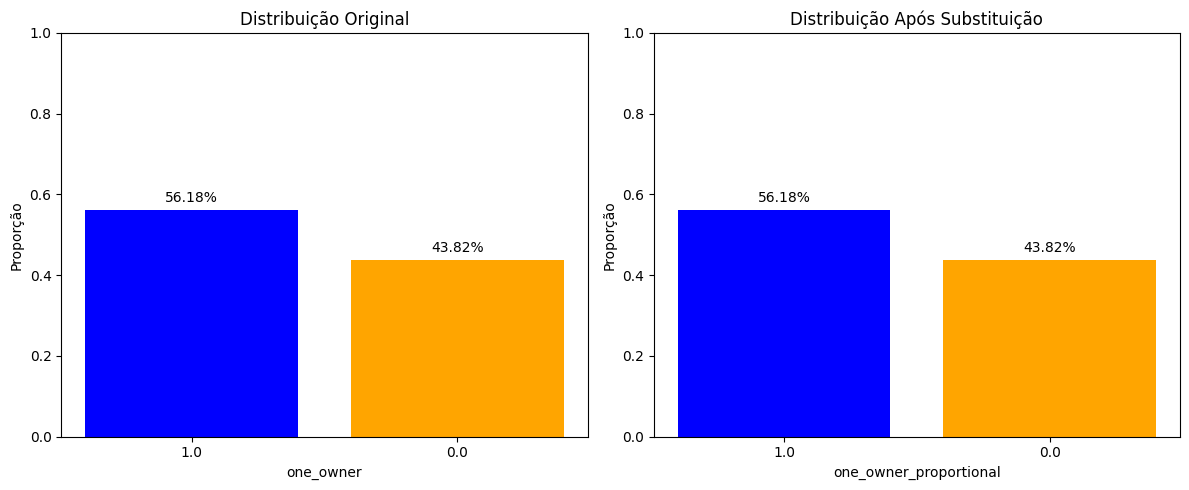

In [714]:
new_distribution = cars_df['one_owner_proportional'].value_counts(normalize=True)

# Plotando as distribuições
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

original_distribution = proportions
ax[0].bar(original_distribution.index.astype(str), original_distribution, color=['blue', 'orange'])
ax[0].set_title('Distribuição Original')
ax[0].set_xlabel('one_owner')
ax[0].set_ylabel('Proporção')
ax[0].set_ylim(0, 1)
for i, v in enumerate(original_distribution):
    ax[0].text(i, v + 0.02, f'{v:.2%}', ha='center')

ax[1].bar(new_distribution.index.astype(str), new_distribution, color=['blue', 'orange'])
ax[1].set_title('Distribuição Após Substituição')
ax[1].set_xlabel('one_owner_proportional')
ax[1].set_ylabel('Proporção')
ax[1].set_ylim(0, 1)
for i, v in enumerate(new_distribution):
    ax[1].text(i, v + 0.02, f'{v:.2%}', ha='center')

plt.tight_layout()
plt.show()

In [715]:
# agora podemos deletar one_owner

cars_df.drop('one_owner', axis=1, inplace=True)

cars_df.rename(columns={'one_owner_proportional': 'one_owner'}, inplace=True)
cars_df

,manufacturer,model,year,mileage,engine,accidents_or_damage,personal_use_only,seller_name,seller_rating,driver_rating,...,price_drop,price,engine_size,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,one_owner
456056,Land Rover,Range Rover Sport HSE Dynamic,2018,33585.00,V6,0.00,0.00,Schaumburg Ford,4.10,4.00,...,500.00,53950.00,None,Automatic,4WD,Gasoline,20.00,Black,Black,1.00
563956,Nissan,Armada SL,2017,63009.00,5.6L V8 32V GDI DOHC,0.00,1.00,World Auto Inc.,2.30,4.70,...,NaN,27885.00,5.6L,Automatic,RWD,Gasoline,16.50,Black,Beige,0.00
724184,Toyota,Tundra 1794,2018,51316.00,"I-FORCE 5.7L V-8 DOHC, VVT-i variable valve co...",0.00,1.00,CAL Cars,4.40,4.80,...,1000.00,46995.00,5.7L,Automatic,4WD,Gasoline,15.00,Silver,Black,0.00
706657,Toyota,Avalon XLE,2015,89444.00,3.5L V6 24V MPFI DOHC,0.00,1.00,Scanlon Lexus,4.70,4.70,...,482.00,17987.00,3.5L,Automatic,FWD,Gasoline,26.00,Gray,Gray,1.00
551197,Mercedes-Benz,GLS 450 4MATIC,2023,2191.00,3.0L I6 24V GDI DOHC Turbo,0.00,1.00,Lupient Buick GMC,4.50,NaN,...,5969.00,96648.00,3.0L,Automatic,AWD,Gasoline,24.91,Other,Brown,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340527,Hyundai,Elantra SE,2017,52900.00,"Nu 2L I-4 DOHC, D-CVVT variable valve control,...",0.00,0.00,Bommarito Nissan Hazelwood,4.80,4.70,...,NaN,16995.00,2L,Automatic,FWD,Gasoline,33.50,Blue,Gray,0.00
618501,RAM,ProMaster 1500 Low Roof,2015,45195.00,3.0L I4 16V DDI DOHC Turbo Diesel,0.00,1.00,Woody's Dodge Jeep Chrysler RAM,4.60,4.10,...,NaN,54870.00,3.0L,Automatic,FWD,Diesel,25.01,White,Gray,0.00
673837,Toyota,Highlander,2013,160000.00,3.5L V6 24V MPFI DOHC,0.00,1.00,Trade Guru,3.40,4.70,...,NaN,13991.00,3.5L,Automatic,AWD,Gasoline,19.50,White,Beige,1.00
291906,GMC,Yukon XL Denali,2016,102462.00,6.2L V8 16V GDI OHV,0.00,1.00,Murray Ford Superstore,4.80,4.70,...,213.00,32777.00,6.2L,Automatic,RWD,Gasoline,18.50,Black,Black,0.00


## 2.15 Coluna ```personal_use_only```

In [724]:
cars_df['personal_use_only'].value_counts()

personal_use_only
1.00    121218
0.00     63107
Name: count, dtype: int64

In [725]:
cars_df['personal_use_only'].isna().sum()

6198

Vamos usar a mesma estratégia usada na última coluna.

In [726]:
proportions_personal_use = cars_df['personal_use_only'].value_counts(normalize=True)
cars_df['puo_proportional'] = cars_df['personal_use_only'].apply(
    lambda x: np.random.choice([0, 1], p=[proportions_personal_use[0], proportions_personal_use[1]]) if pd.isna(x) else x
)

In [730]:
cars_df['puo_proportional'].isna().sum()

0

E apenas para confirmar a correspondência de proporções antes e depois da substituição dos valores nulos:

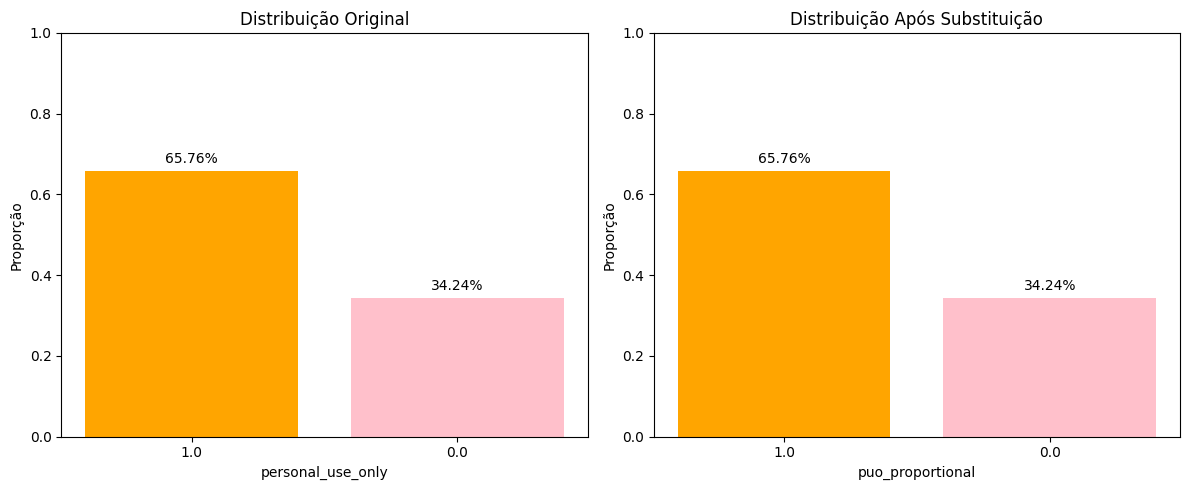

In [743]:
new_distribution2 = cars_df['puo_proportional'].value_counts(normalize=True)

# Plotando as distribuições
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

original_distribution2 = proportions_personal_use
ax[0].bar(original_distribution2.index.astype(str), original_distribution2, color=['orange', 'pink'])
ax[0].set_title('Distribuição Original')
ax[0].set_xlabel('personal_use_only')
ax[0].set_ylabel('Proporção')
ax[0].set_ylim(0, 1)
for i, v in enumerate(original_distribution2):
    ax[0].text(i, v + 0.02, f'{v:.2%}', ha='center')

ax[1].bar(new_distribution2.index.astype(str), new_distribution2, color=['orange', 'pink'])
ax[1].set_title('Distribuição Após Substituição')
ax[1].set_xlabel('puo_proportional')
ax[1].set_ylabel('Proporção')
ax[1].set_ylim(0, 1)
for i, v in enumerate(new_distribution2):
    ax[1].text(i, v + 0.02, f'{v:.2%}', ha='center')

plt.tight_layout()
plt.show()

In [744]:
# deletando personal_use_only

cars_df.drop('personal_use_only', axis=1, inplace=True)

cars_df.rename(columns={'puo_proportional': 'personal_use_only'}, inplace=True)
cars_df

,manufacturer,model,year,mileage,engine,accidents_or_damage,seller_name,seller_rating,driver_rating,driver_reviews_num,...,price,engine_size,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,one_owner,personal_use_only
456056,Land Rover,Range Rover Sport HSE Dynamic,2018,33585.00,V6,0.00,Schaumburg Ford,4.10,4.00,45.00,...,53950.00,None,Automatic,4WD,Gasoline,20.00,Black,Black,1.00,0.00
563956,Nissan,Armada SL,2017,63009.00,5.6L V8 32V GDI DOHC,0.00,World Auto Inc.,2.30,4.70,78.00,...,27885.00,5.6L,Automatic,RWD,Gasoline,16.50,Black,Beige,0.00,1.00
724184,Toyota,Tundra 1794,2018,51316.00,"I-FORCE 5.7L V-8 DOHC, VVT-i variable valve co...",0.00,CAL Cars,4.40,4.80,199.00,...,46995.00,5.7L,Automatic,4WD,Gasoline,15.00,Silver,Black,0.00,1.00
706657,Toyota,Avalon XLE,2015,89444.00,3.5L V6 24V MPFI DOHC,0.00,Scanlon Lexus,4.70,4.70,74.00,...,17987.00,3.5L,Automatic,FWD,Gasoline,26.00,Gray,Gray,1.00,1.00
551197,Mercedes-Benz,GLS 450 4MATIC,2023,2191.00,3.0L I6 24V GDI DOHC Turbo,0.00,Lupient Buick GMC,4.50,NaN,0.00,...,96648.00,3.0L,Automatic,AWD,Gasoline,24.91,Other,Brown,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340527,Hyundai,Elantra SE,2017,52900.00,"Nu 2L I-4 DOHC, D-CVVT variable valve control,...",0.00,Bommarito Nissan Hazelwood,4.80,4.70,640.00,...,16995.00,2L,Automatic,FWD,Gasoline,33.50,Blue,Gray,0.00,0.00
618501,RAM,ProMaster 1500 Low Roof,2015,45195.00,3.0L I4 16V DDI DOHC Turbo Diesel,0.00,Woody's Dodge Jeep Chrysler RAM,4.60,4.10,5.00,...,54870.00,3.0L,Automatic,FWD,Diesel,25.01,White,Gray,0.00,1.00
673837,Toyota,Highlander,2013,160000.00,3.5L V6 24V MPFI DOHC,0.00,Trade Guru,3.40,4.70,140.00,...,13991.00,3.5L,Automatic,AWD,Gasoline,19.50,White,Beige,1.00,1.00
291906,GMC,Yukon XL Denali,2016,102462.00,6.2L V8 16V GDI OHV,0.00,Murray Ford Superstore,4.80,4.70,26.00,...,32777.00,6.2L,Automatic,RWD,Gasoline,18.50,Black,Black,0.00,1.00


## 2.16 Colunas ```seller_name``` e ```seller_rating```

Certamente o nome do vendedor não influencia para nada no preço da venda dos carros. Assim, essa coluna deverá ser apagada.

In [745]:
cars_df.drop('seller_name', axis=1, inplace=True)

Resta saber se há relação entre a avaliação do vendedor e o preço de venda.

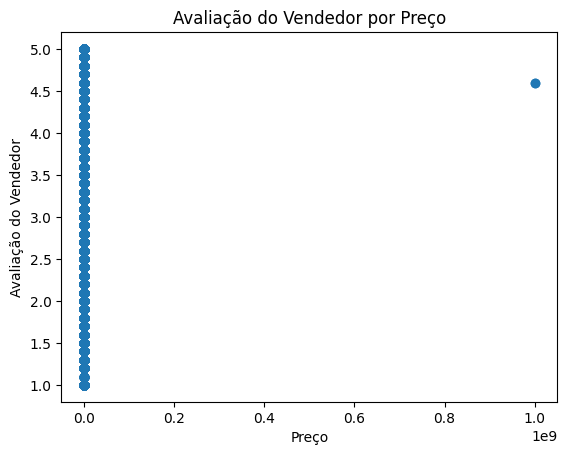

In [748]:


plt.scatter(cars_df['price'], cars_df['seller_rating'])
plt.title('Avaliação do Vendedor por Preço')
plt.ylabel('Avaliação do Vendedor')
plt.xlabel('Preço')
plt.show()

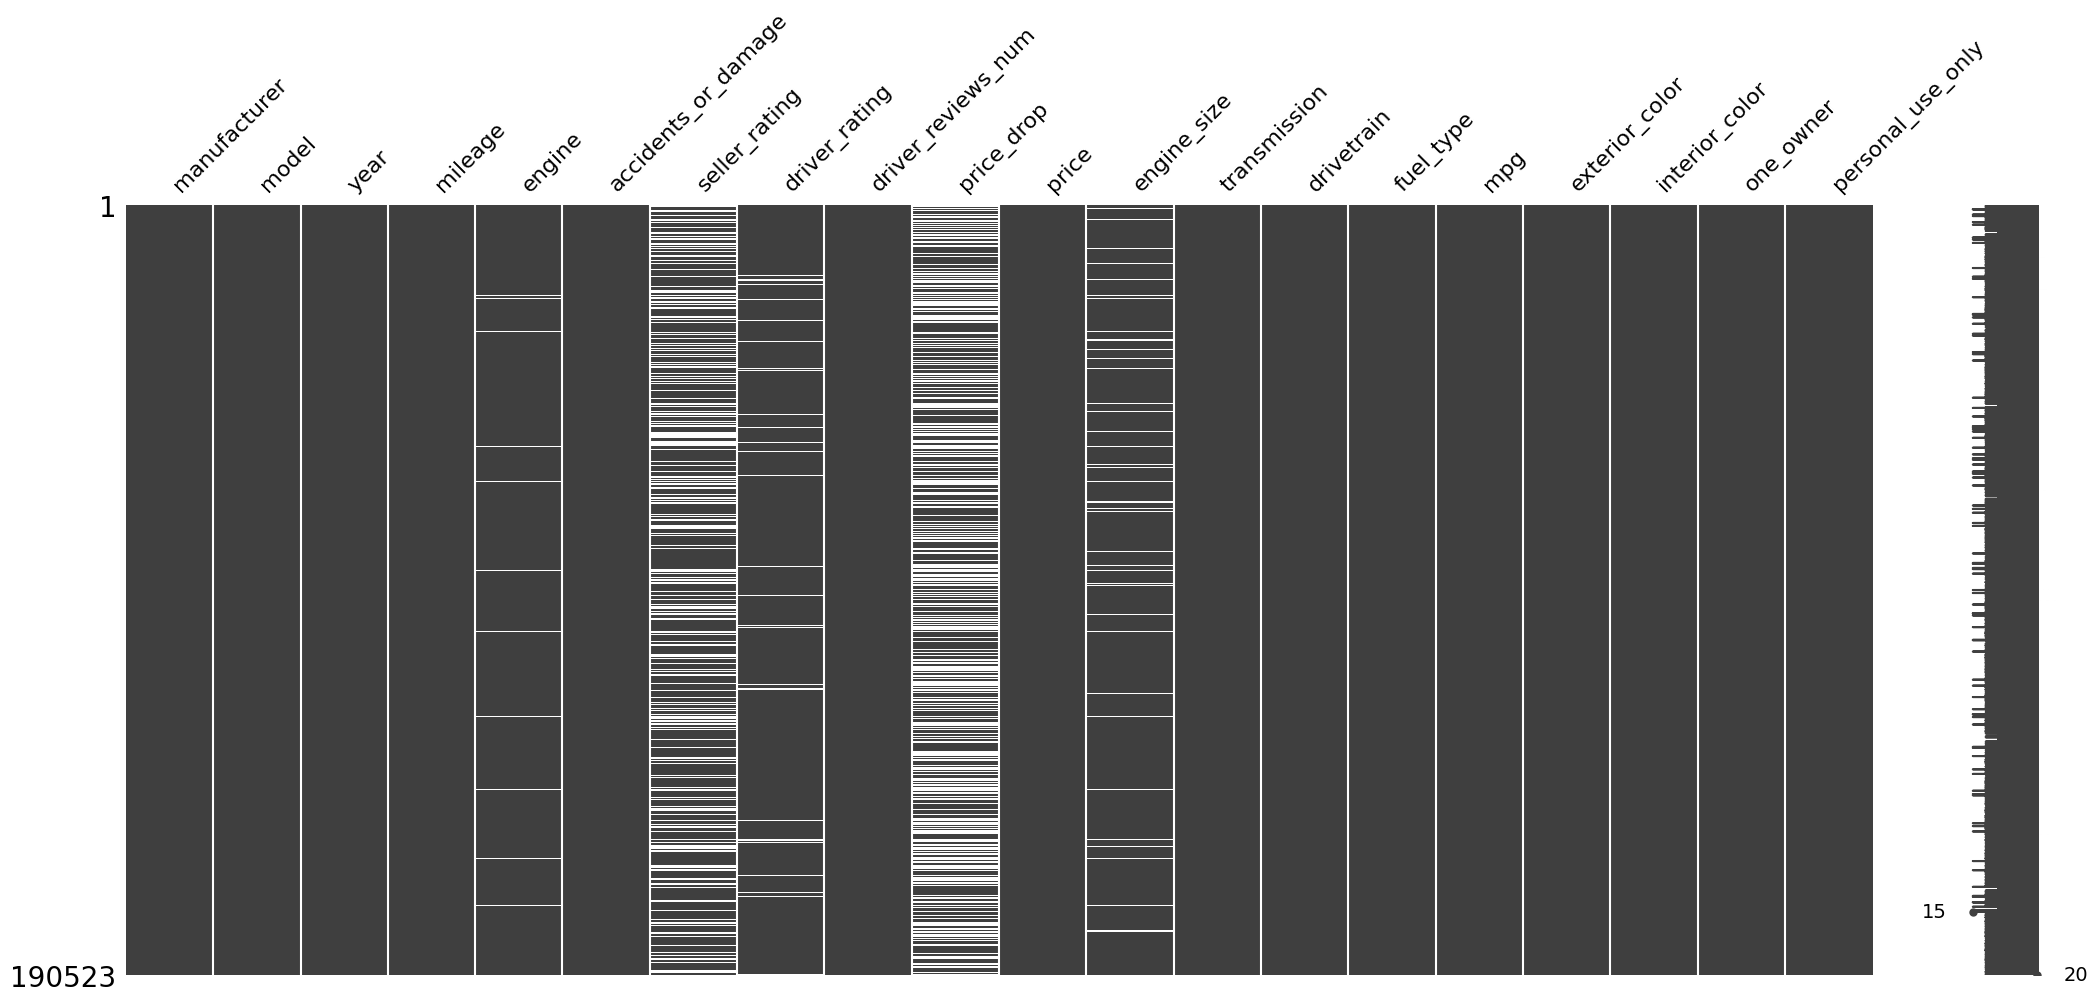

In [749]:
import missingno as msno
msno.matrix(cars_df)
plt.show()

Comecemos analizando os valores únicos de ```manufacturer```:

In [28]:
counts = cars_df['manufacturer'].value_counts()
counts

manufacturer
Ford             19828
Toyota           14880
Chevrolet        13899
Nissan           12123
Jeep             10458
Mercedes-Benz    10147
Honda             9416
BMW               9264
Kia               8832
GMC               7325
Dodge             6322
Subaru            6175
Volkswagen        6157
Hyundai           5487
Lexus             5283
RAM               4935
Audi              4474
Cadillac          4468
Mazda             3893
Buick             3623
INFINITI          3192
Chrysler          3166
Land Rover        3049
Porsche           2973
Lincoln           2649
Volvo             2537
Acura             2098
Mitsubishi        1498
Tesla             1485
Jaguar             887
Name: count, dtype: int64

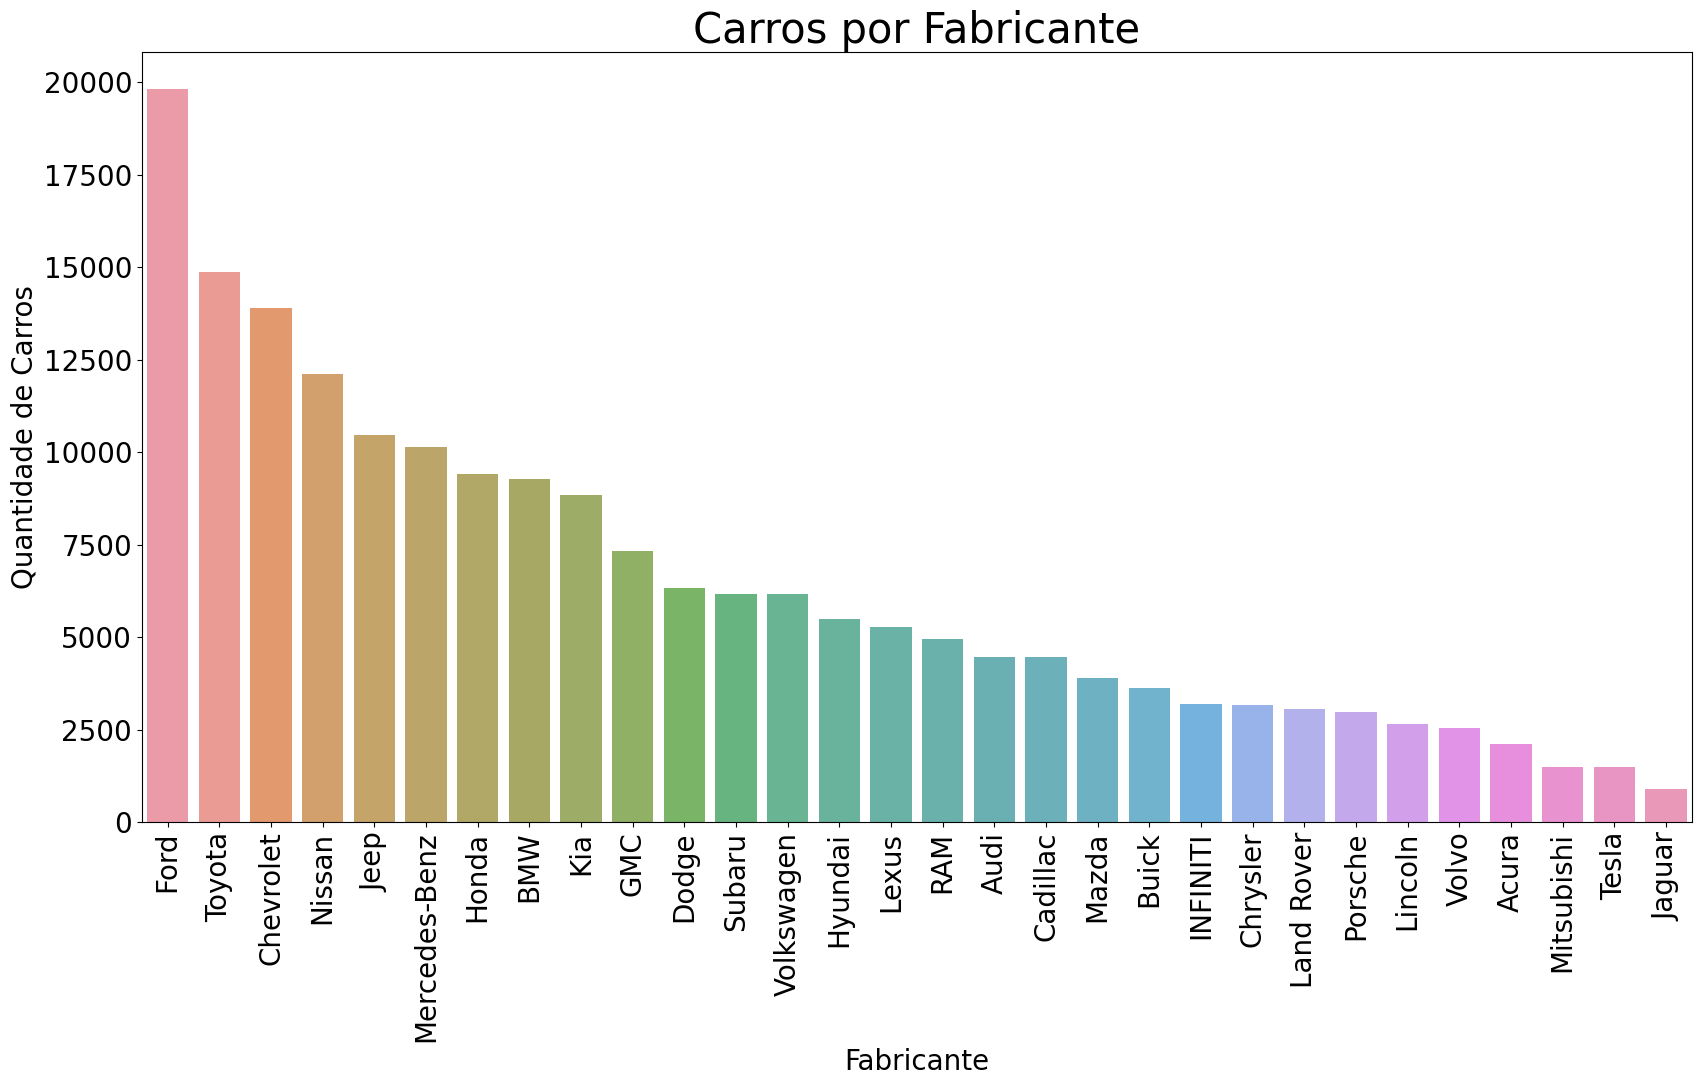

In [29]:
rainbow_palette = sns.color_palette("husl", len(counts))
# rainbow_palette = sns.color_palette("cubehelix")
# sns.set(style="whitegrid")
plt.figure(figsize = (20, 10))
sns.barplot(x=counts.index, y=counts.values, hue=counts.index, palette=rainbow_palette, alpha = 0.8)
plt.title('Carros por Fabricante', fontsize = 30)
plt.ylabel('Quantidade de Carros', fontsize = 20)
plt.xlabel('Fabricante', fontsize = 20)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.show()


Vamos comparar esses valores com a soma dos valores faturados pelos fabricantes.

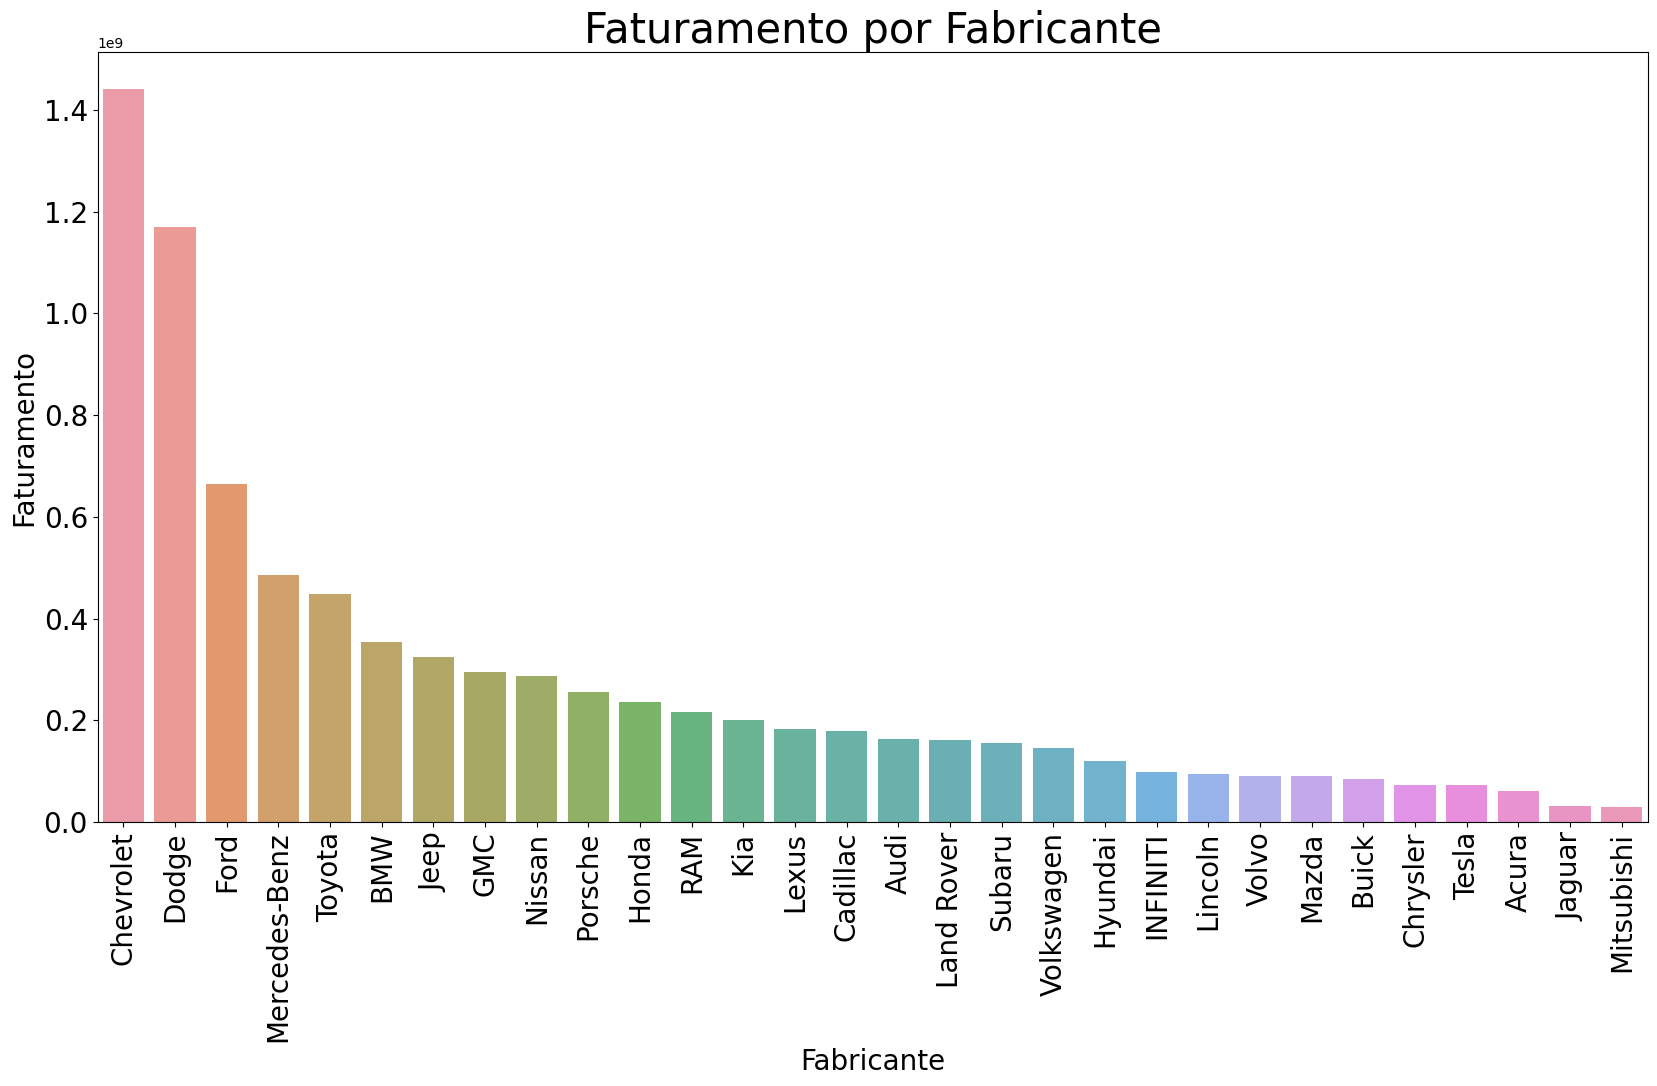

In [30]:
total_price_by_manufacturer = cars_df.groupby('manufacturer')['price'].sum()
total_price_by_manufacturer_decrescent = total_price_by_manufacturer.sort_values(ascending=False)
rainbow_palette = sns.color_palette("husl", len(counts))
plt.figure(figsize = (20, 10))
sns.barplot(x=total_price_by_manufacturer_decrescent.index, y=total_price_by_manufacturer_decrescent.values, hue=total_price_by_manufacturer_decrescent.index, palette=rainbow_palette, alpha = 0.8)
plt.title('Faturamento por Fabricante', fontsize = 30)
plt.ylabel('Faturamento', fontsize = 20)
plt.xlabel('Fabricante', fontsize = 20)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.show()

Interessante notar que o faturamente mais ou menos acompanha a quantidade de carros vendidos em praticamente todos os fabricantes, tendo variações de duas ou três posições no ranking, em geral. No entanto, há um fabricante que chama atenção: Dodge.

No plot 'Carros por Fabricante', ele aparece em 11º lugar em maior quantidade de carros. Mas no plot 'Faturamento por Fabricante', ele aparece em 2º com o maior faturamento.

Vamos calcular a média de faturamento por fabricante.

In [75]:
mean_manufacturer = cars_df[['manufacturer', 'price']].groupby('manufacturer', as_index = False).mean()
mean_man_dec = mean_manufacturer.sort_values(by=['price'], ascending=False)
mean_man_dec


,manufacturer,price
7,Dodge,184913.78
5,Chevrolet,103744.32
23,Porsche,85892.48
16,Land Rover,52882.81
26,Tesla,48492.37
20,Mercedes-Benz,47844.77
24,RAM,44002.59
9,GMC,40324.54
4,Cadillac,39842.17
2,BMW,38100.70


Interessante que os dois fabricantes com maior faturamento, são so que também cobram, em média, valores mais altos. São eles: Dodge, Chevrolet. 

Por outro lado, em relação ao número de vendas, a relação não é tão forte, já que Chevrolet está em 3º com maior número de vendas e Doge em 11º, conforme já foi dito acima.

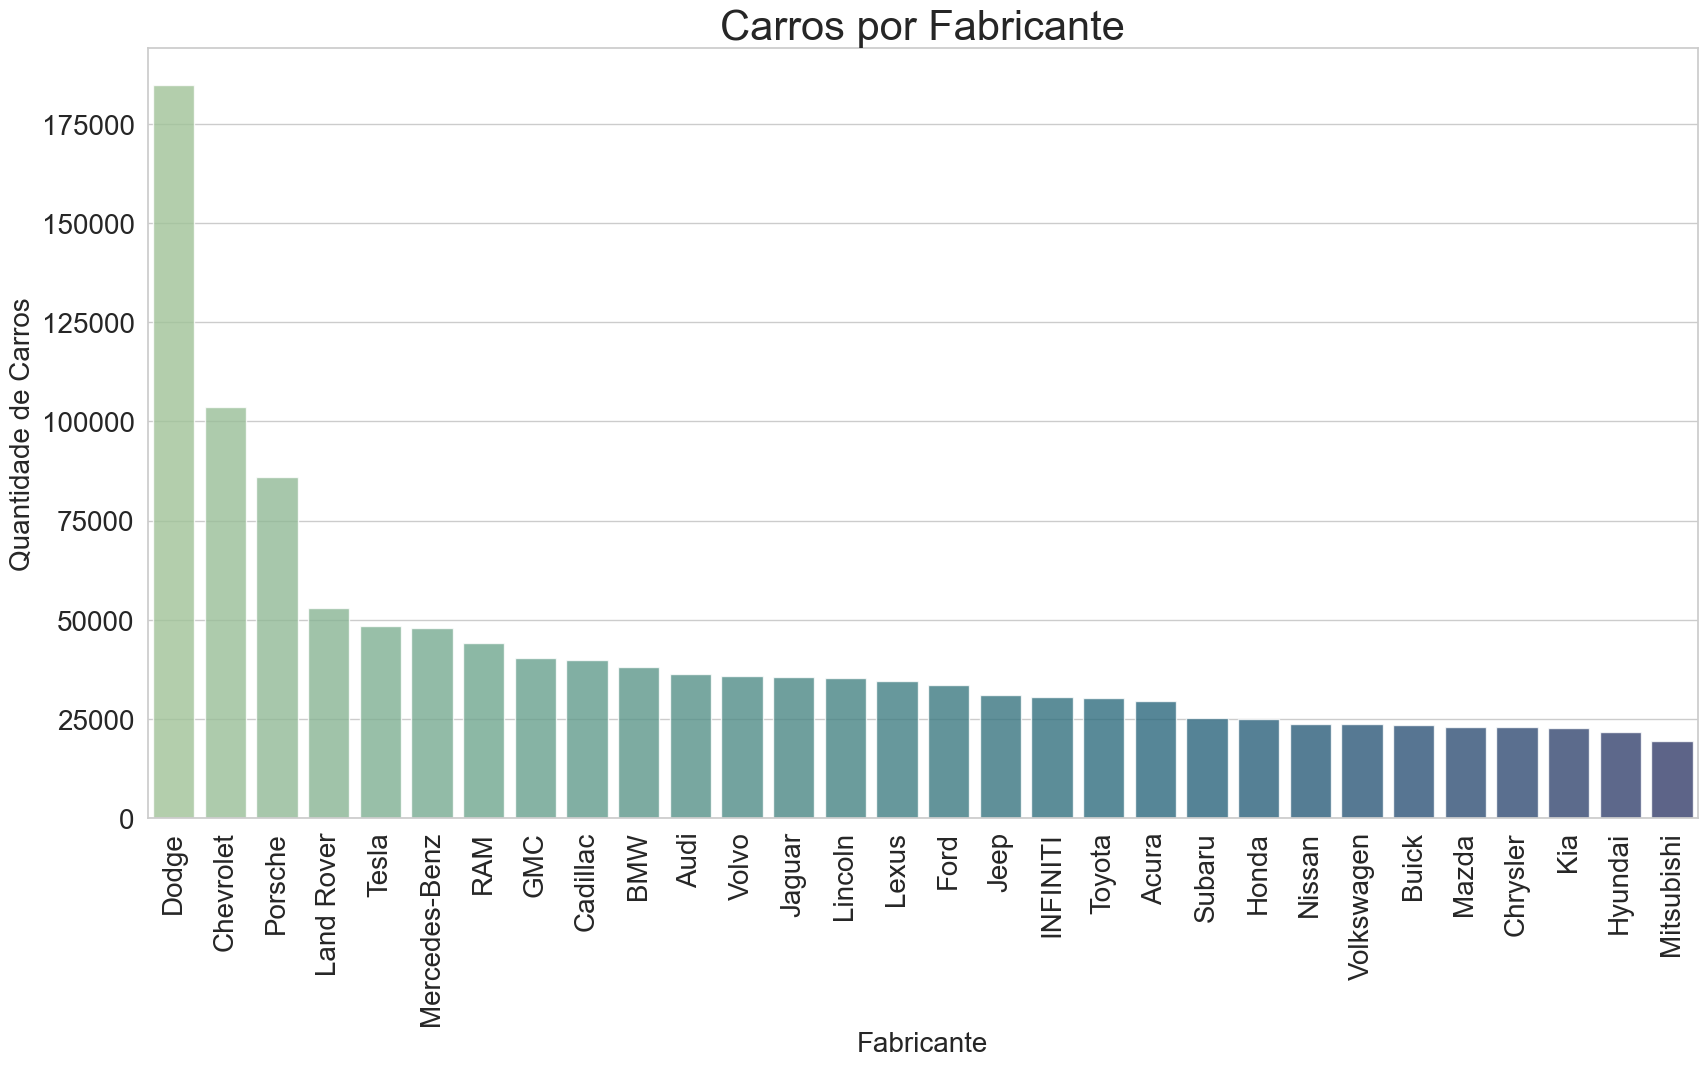

In [85]:
rainbow_palette = sns.color_palette("crest", len(counts))
plt.figure(figsize = (20, 10))
sns.barplot(x=mean_man_dec['manufacturer'], y=mean_man_dec['price'], hue=mean_man_dec['manufacturer'], palette=rainbow_palette, alpha = 0.8)
plt.title('Carros por Fabricante', fontsize = 30)
plt.ylabel('Quantidade de Carros', fontsize = 20)
plt.xlabel('Fabricante', fontsize = 20)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.show()

Tamanha diferença definitivamente chama a atenção, e é possível que haja outliers nos preços de Dodge.

In [100]:
df_sorted = cars_df[['manufacturer', 'model', 'year', 'price']].sort_values(by='price', ascending=False)
df_sorted

,manufacturer,model,year,price
188260,Dodge,Durango Citadel,2018,1000000000.00
108142,Chevrolet,Cobalt LT,2009,1000000000.00
613083,Porsche,Carrera GT,2005,1495000.00
213658,Ford,GT,2019,1275000.00
615573,Porsche,911 Turbo S,2019,1200888.00
...,...,...,...,...
567062,Nissan,Cube 1.8 SL,2009,750.00
760485,Volvo,V70 T5,1998,695.00
680496,Toyota,C-HR LE,2019,399.00
553053,Mitsubishi,Outlander Sport SE,2021,399.00


In [106]:
durango_citadel_df = df_sorted[(df_sorted['model'] == 'Durango Citadel') & (df_sorted['year'] == 2018)]
durango_citadel_df

,manufacturer,model,year,price
188260,Dodge,Durango Citadel,2018,1000000000.00
186980,Dodge,Durango Citadel,2018,35998.00
187447,Dodge,Durango Citadel,2018,35957.00
185879,Dodge,Durango Citadel,2018,35677.00
188276,Dodge,Durango Citadel,2018,33090.00
188004,Dodge,Durango Citadel,2018,32988.00
189366,Dodge,Durango Citadel,2018,31999.00
187059,Dodge,Durango Citadel,2018,31995.00
190168,Dodge,Durango Citadel,2018,31841.00
188649,Dodge,Durango Citadel,2018,31576.00


Claramente há um outlier em Dodge. Vamos tentar comparar esse veículo com demais semelhantes a ele.

Podemos já ver um outlier na coluna ```mileage```. Considerando que um carro roda em média 12.000 milhas por ano, levaria 83 anos para percorrer 999.999 milhas. O carro que tem essa milhagem é de 1967, portanto, é claramente um outlier.

In [12]:
cars_df[cars_df['mileage'] == 999999]

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
494409,Lincoln,Continental,1967,999999.00,V8,Automatic,NaN,Gasoline,NaN,Gold,Black,0.00,1.00,1.00,GR Auto Gallery,3.20,NaN,0.00,4000.00,22900.00


Além disso, podemos ver que há quatro outliers em ```price```, todos com preço de 1,00.

In [13]:
cars_df['year'].value_counts()

year
2020    33483
2021    27239
2019    26364
2022    20143
2018    15662
        ...  
1930        1
1942        1
1940        1
1952        1
1923        1
Name: count, Length: 90, dtype: int64

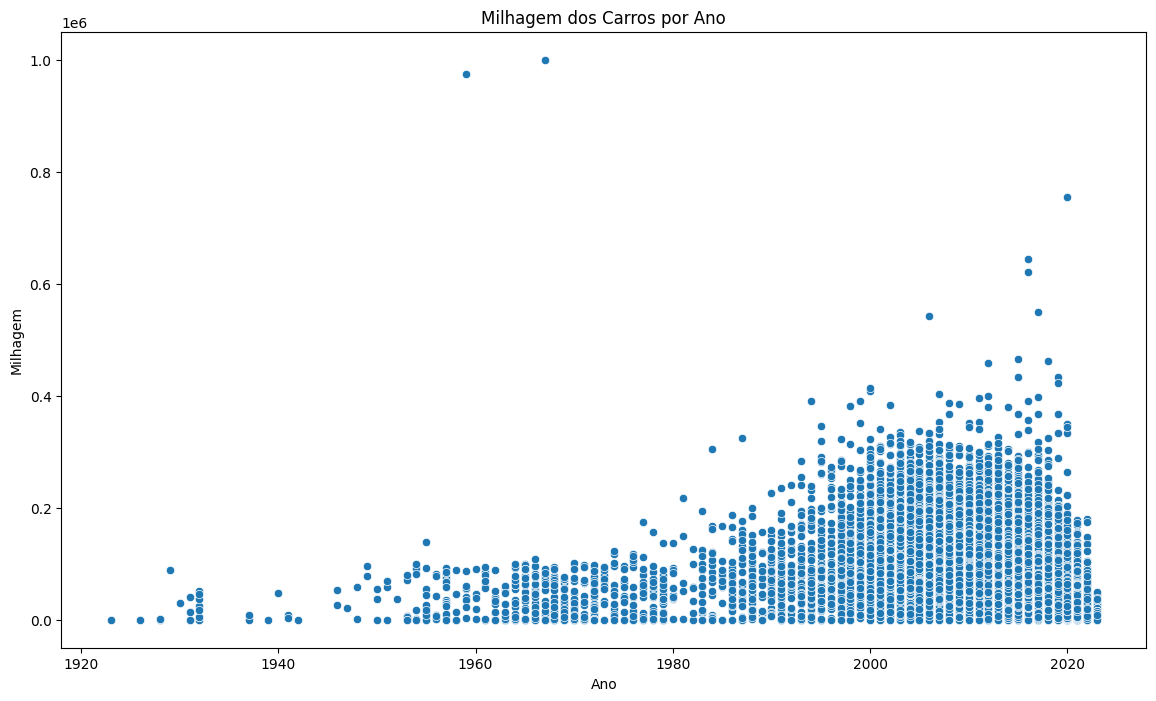

In [134]:
plt.figure(figsize=(14, 8))
sns.scatterplot(x='year', y='mileage', data=cars_df)
plt.xlabel('Ano')
plt.ylabel('Milhagem')
plt.title('Milhagem dos Carros por Ano')
plt.show()

In [112]:
cars_df[cars_df['mileage'] > 400000]

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
302334,Honda,Pilot LX,2020,754680.00,3.5L V6 24V GDI SOHC,6-Speed Automatic,Front-wheel Drive,Gasoline,19-27,Platinum White Pearl,Black,0.00,1.00,1.00,Florida Fine Cars Margate,5.00,4.30,156.00,500.00,20499.00
278780,GMC,Sierra 1500 Limited SLE,2019,433110.00,5.3L V8 16V GDI OHV,6-Speed Automatic,Four-wheel Drive,Gasoline,16-23,Red Quartz Tintcoat,Jet Black,1.00,0.00,1.00,Hyundai of Goshen,NaN,4.90,25.00,500.00,33990.00
220337,Ford,Transit-350 XLT,2017,549013.00,3.5L V6 24V GDI DOHC Twin Turbo,6-Speed Automatic,Rear-wheel Drive,Gasoline,NaN,Shadow Black,Charcoal,1.00,1.00,1.00,East Coast Auto Source,1.80,4.40,28.00,NaN,11795.00
276497,GMC,Yukon SLT,2000,408000.00,Vortec 5.3L V-8 engine with 285HP,Automatic,Four-wheel Drive,Gasoline,14-17,Dark Toreador Red Metallic,Medium Dark Pewter,1.00,0.00,0.00,Jackson Auto Co.,NaN,4.50,10.00,NaN,4900.00
587187,Nissan,NV200 S,2015,465652.00,2.0L I4 16V MPFI DOHC,Automatic CVT,Front-wheel Drive,Gasoline,24-26,Fresh Powder,Gray,1.00,1.00,1.00,East Coast Auto Source,1.80,3.80,11.00,NaN,5995.00
494409,Lincoln,Continental,1967,999999.00,V8,Automatic,NaN,Gasoline,NaN,Gold,Black,0.00,1.00,1.00,GR Auto Gallery,3.20,NaN,0.00,4000.00,22900.00
169253,Dodge,Ram 3500 Laramie,2007,403246.00,"Cummins 6.7L I-6 diesel direct injection, inte...",Manual,Rear-wheel Drive,Diesel,0-255,Bright White Clearcoat,Medium Slate Gray,1.00,0.00,1.00,AutoMax of Memphis,4.30,4.50,15.00,NaN,16995.00
497905,Mazda,CX-9 Touring,2012,458500.00,273.0HP 3.7L V6 Cylinder Engine Gasoline Fuel,A/T,Front-wheel Drive,Gasoline,NaN,Silver,Black,NaN,NaN,NaN,NaN,NaN,4.50,49.00,NaN,15950.00
456962,Land Rover,Range Rover Sport Supercharged SE,2016,644736.00,3.0L V6 24V GDI DOHC Supercharged,8-Speed Automatic,Four-wheel Drive,Gasoline,17-23,Firenze Red,Ebony / Ebony,0.00,0.00,1.00,U Car Connect,NaN,4.60,41.00,NaN,34777.00
632570,RAM,3500 SLT,2015,433217.00,6.7L I6 24V DDI OHV Turbo Diesel,6-Speed Automatic,Four-wheel Drive,Diesel,NaN,Bright White,Diesel Gray / Black,1.00,0.00,0.00,Lowery Brothers Motors,4.80,4.10,31.00,NaN,26900.00


In [113]:
cars_df[cars_df['mileage'] > 450000]

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
302334,Honda,Pilot LX,2020,754680.00,3.5L V6 24V GDI SOHC,6-Speed Automatic,Front-wheel Drive,Gasoline,19-27,Platinum White Pearl,Black,0.00,1.00,1.00,Florida Fine Cars Margate,5.00,4.30,156.00,500.00,20499.00
220337,Ford,Transit-350 XLT,2017,549013.00,3.5L V6 24V GDI DOHC Twin Turbo,6-Speed Automatic,Rear-wheel Drive,Gasoline,NaN,Shadow Black,Charcoal,1.00,1.00,1.00,East Coast Auto Source,1.80,4.40,28.00,NaN,11795.00
587187,Nissan,NV200 S,2015,465652.00,2.0L I4 16V MPFI DOHC,Automatic CVT,Front-wheel Drive,Gasoline,24-26,Fresh Powder,Gray,1.00,1.00,1.00,East Coast Auto Source,1.80,3.80,11.00,NaN,5995.00
494409,Lincoln,Continental,1967,999999.00,V8,Automatic,NaN,Gasoline,NaN,Gold,Black,0.00,1.00,1.00,GR Auto Gallery,3.20,NaN,0.00,4000.00,22900.00
497905,Mazda,CX-9 Touring,2012,458500.00,273.0HP 3.7L V6 Cylinder Engine Gasoline Fuel,A/T,Front-wheel Drive,Gasoline,NaN,Silver,Black,NaN,NaN,NaN,NaN,NaN,4.50,49.00,NaN,15950.00
456962,Land Rover,Range Rover Sport Supercharged SE,2016,644736.00,3.0L V6 24V GDI DOHC Supercharged,8-Speed Automatic,Four-wheel Drive,Gasoline,17-23,Firenze Red,Ebony / Ebony,0.00,0.00,1.00,U Car Connect,NaN,4.60,41.00,NaN,34777.00
316531,Honda,Ridgeline RTS,2006,543099.00,3.5L V6 24V MPFI SOHC,5-Speed Automatic,Four-wheel Drive,Gasoline,16-21,Black,Gray,1.00,1.00,1.00,Maple Leaf Motors,NaN,4.60,103.00,NaN,6999.00
617503,Porsche,356 A,1959,974302.00,NaN,4-Speed Manual,NaN,NaN,NaN,Green,Tan,0.00,NaN,NaN,European Collectibles,NaN,NaN,0.00,5000.00,179500.00
634652,RAM,3500 Tradesman,2018,461204.00,6.7L I6 24V DDI OHV Turbo Diesel,6-Speed Automatic,Four-wheel Drive,Diesel,NaN,Bright White Clearcoat,Diesel Gray / Black,0.00,1.00,0.00,McDonald GMC Cadillac,4.90,4.70,61.00,NaN,23000.00
220225,Ford,Transit-350 XL,2016,620637.00,3.7L V6 24V MPFI DOHC,6-Speed Automatic,Rear-wheel Drive,NaN,NaN,Oxford White,Pewter,1.00,1.00,1.00,Cornhusker Nissan of Norfolk,NaN,4.30,22.00,NaN,39990.00


In [ ]:
training_set[training_set['price']== 1]

In [ ]:
training_set.hist(figsize=(10, 10), bins=50)
plt.suptitle('Histogramas das Variáveis Numéricas')
plt.subplots_adjust(wspace=0.4, hspace=0.7, left=0.1, bottom=0.1, right=0.9, top=0.9)
plt.show()

In [80]:
print(training_set.isnull().sum())

manufacturer                0
model                       0
year                        0
mileage                   506
engine                  15050
transmission             9904
drivetrain              21562
fuel_type               22927
mpg                    142071
exterior_color           8859
interior_color          56975
accidents_or_damage     24212
one_owner               31483
personal_use_only       24852
seller_name              8593
seller_rating          213973
driver_rating           31632
driver_reviews_num          0
price_drop             351979
price                       0
dtype: int64


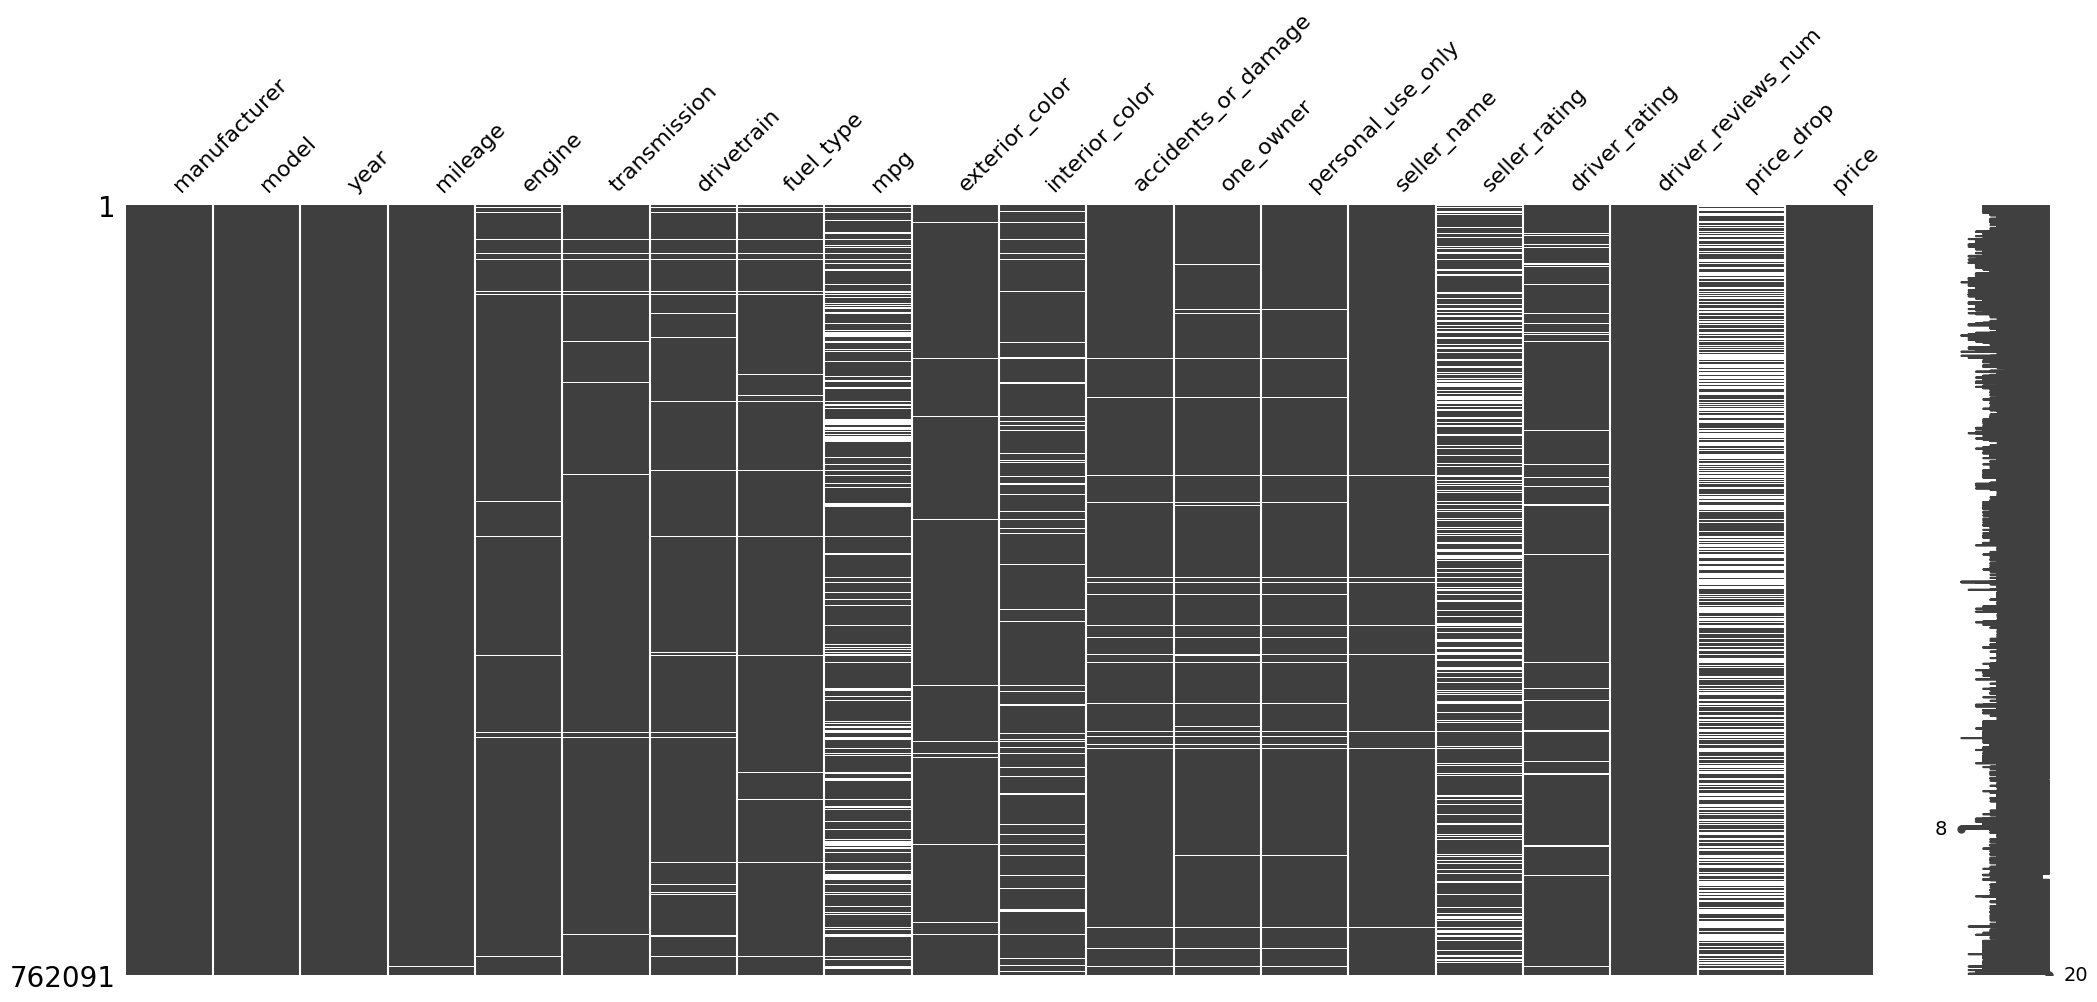

In [82]:
import missingno as msno
msno.matrix(training_set)
plt.show()

In [13]:
training_set['drivetrain'].value_counts()

drivetrain
Front-wheel Drive                                              241432
All-wheel Drive                                                230219
Four-wheel Drive                                               157082
Rear-wheel Drive                                                97437
FWD                                                              6450
AWD                                                              3586
4WD                                                              1923
RWD                                                              1758
All-Wheel Drive                                                   120
Unknown                                                           105
Front-Wheel Drive                                                 104
Front-Wheel Drive with Limited-Slip Differential                   44
Four-Wheel Drive                                                   43
Four-Wheel Drive with Locking and Limited-Slip Differential        42
Rear-Whee

Como a quantidade de carros com o diferencial (locking e limited-slip) é pequena, decidi por ignorar essa funcionalidade.

In [14]:
# substituindo os valores faltantes pela moda

mode_drivetrain = training_set['drivetrain'].mode()[0]
training_set['drivetrain'] = training_set['drivetrain'].fillna(mode_drivetrain)

In [15]:
training_set['drivetrain'] = training_set['drivetrain'].apply(lambda x: 'Unknown' if 'Engine' in x else x)
# Dicionário de mapeamento para normalização
# Unknown foi substituído pela moda (FWD)
# Como só ficaremos com 3 carros 2WD, resolvi substituí-los por FWD também
drivetrain_mapping = {
    'Front-wheel Drive': 'FWD',
    'Rear-wheel Drive': 'RWD',
    'All-wheel Drive': 'AWD',
    'Four-wheel Drive': '4WD',
    'Unknown': 'FWD',
    'RWD': 'RWD',
    'FWD': 'FWD',
    'AWD': 'AWD',
    '4WD': '4WD',
    'Front-Wheel Drive': 'FWD',
    'Front Wheel Drive': 'FWD',
    'Rear-Wheel Drive': 'RWD',
    'Four-Wheel Drive': '4WD',
    'Four Wheel Drive': '4WD',
    'All Wheel Drive': 'AWD',
    '4x4': '4WD',
    '4X4': '4WD',
    '4x2': 'FWD',
    '2WD': 'FWD',
    'All-Wheel Drive': 'AWD',
    'Rear Wheel Drive': 'RWD',
    'Front-Wheel Drive with Limited-Slip Differential': 'FWD',
    'Four-Wheel Drive with Locking and Limited-Slip Differential': '4WD',
    'All-Wheel Drive with Locking and Limited-Slip Differential': 'AWD',
    'All-Wheel Drive with Locking Differential': 'AWD',
    'Rear-Wheel Drive with Limited-Slip Differential': 'RWD',
    'Four-Wheel Drive with Locking Differential': '4WD'
}

training_set['drivetrain'] = training_set['drivetrain'].replace(drivetrain_mapping)


training_set['drivetrain'].value_counts()

drivetrain
FWD    269727
AWD    233989
4WD    159126
RWD     99249
Name: count, dtype: int64

In [16]:
training_set['manufacturer'].value_counts()

manufacturer
Ford             79526
Toyota           59535
Chevrolet        56043
Nissan           48529
Jeep             41665
Mercedes-Benz    40824
Honda            37612
BMW              37570
Kia              35063
GMC              29563
Dodge            25250
Subaru           24767
Volkswagen       24620
Hyundai          22203
Lexus            21301
RAM              19364
Audi             17863
Cadillac         17794
Mazda            15485
Buick            14624
Chrysler         12647
INFINITI         12289
Land Rover       12272
Porsche          11461
Lincoln          10608
Volvo            10029
Acura             8489
Tesla             5883
Mitsubishi        5743
Jaguar            3469
Name: count, dtype: int64

In [17]:
mode_drivetrain

'Front-wheel Drive'

In [24]:
# run_times.info()

In [19]:
print(list(training_set['fuel_type'].unique()))

['Gasoline', 'Hybrid', nan, 'Premium', 'Electric', 'Gasoline/Mild Electric Hybrid', 'Diesel', 'E85 Flex Fuel', 'Flexible Fuel', 'Gasoline Fuel', 'Plug-In Hybrid', 'Premium (Required)', 'Regular Unleaded', 'Unspecified', 'Unknown', 'Compressed Natural Gas', 'Other', 'Natural Gas', 'Gaseous', 'Bi-Fuel', 'Flex Fuel Capability', 'Diesel Fuel', 'Premium Unleaded', 'Biodiesel', 'Bio Diesel', 'Hydrogen Fuel Cell', 'Gas', 'PHEV', 'Hybrid Fuel', 'Automatic', 'E85 Fl', 'Electric Fuel System', 'G', 'B', 'Gas/Electric Hybrid', 'Flex Fuel', 'Plug-In Electric/Gas']


## 1. Variáveis Categóricas e Numéricas

Importante ressaltarmos a diferença entre ambas.

* **Variáveis categóricas** – são aquelas que representam qualidade. Nesse estudo, serão consideradas categóricas as variáveis:
    * manufacturer, model, engine, transmission, drivetrain, fuel_type, exterior_color, interior_color, accidents_or_damage, one_owner, personal_use_only, seller_name.

* **Variáveis numéricas** - são as que representam quantidade. Serão assim consideradas as variáveis:
    * mileage, year, mpg, seller_rating, driver_rating, driver_reviews_num, price_drop e price.

Importante ressaltar que ano será considerado uma variável numérica dado o contexto da análise. O que será considerado para fins de análise é o envelhecimento do carro, ou seja, um dado numérico. Seria diferente, caso o ano fosse usado para agrupar os carros, ou seja, para colocá-los em categorias, então seria considerado uma variável categórica.


Vamos calcular a correlação de Pearson entre as variáveis numéricas.


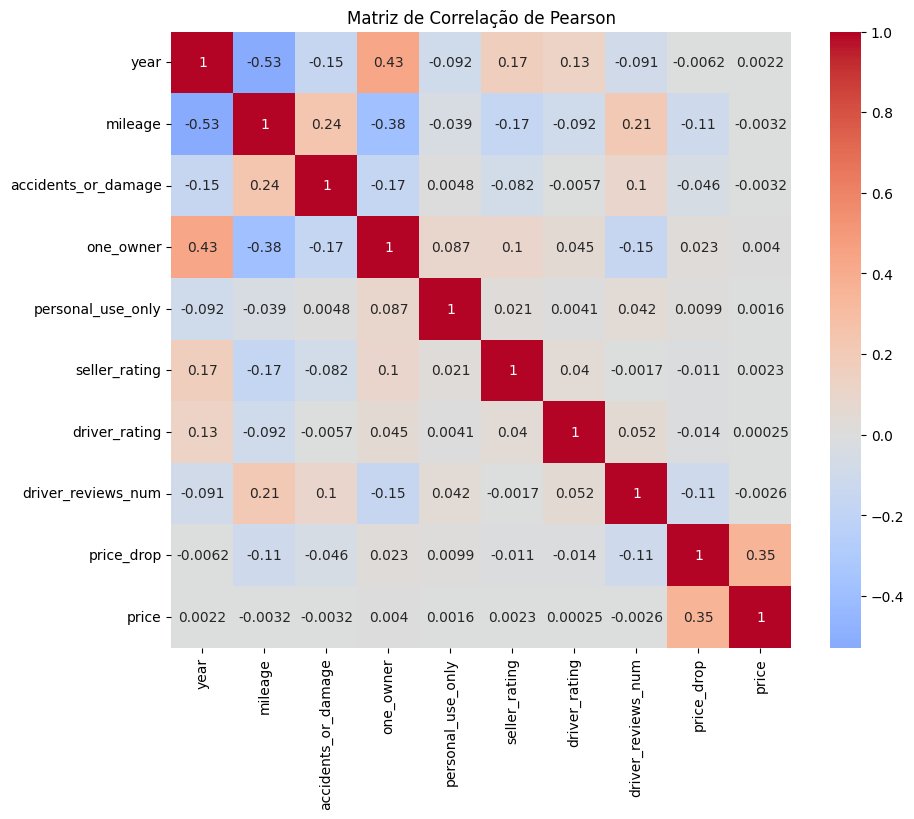

In [29]:
numeric_df = training_set.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr(method='pearson')
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação de Pearson')
plt.show()